In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)


In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

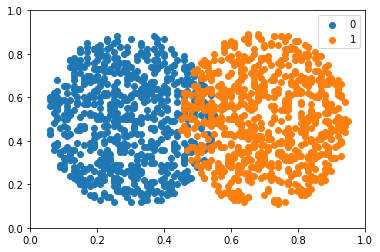

In [7]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [19]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCal(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=1000;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1


In [28]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCaln1(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=1;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1

## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [103]:
#
def SPSA(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCal(i,th+np.array(c))-lossCal(i,th-np.array(c)))/(2*delta))

    return sp

SPSA(1,theta,0.1,10)

[0.002299999999999991,
 -0.003100000000000003,
 -0.00030000000000000024,
 -0.0006000000000000005,
 -0.0013000000000000012,
 -0.0010000000000000009,
 -0.0006000000000000005,
 0.0007000000000000006]

In [29]:
#
def SPSAn1(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCaln1(i,th+np.array(c))-lossCaln1(i,th-np.array(c)))/(2*delta))
    return sp
SPSAn1(1,theta,0.01,6)

[-0.16666666666666666,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

## nshot=1000

In [30]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSA(i,theta,c1,delta)
        print(lossCal(i,theta))
        progress.append(lossCal(i,theta))
        thdata.append(theta)

0.606
0.75
1.174
0.8280000000000001
1.27
1.104
1.17
1.11
0.772
0.81
0.698
1.1
1.226
1.23
0.754
0.74
1.318
1.148
1.27
1.218
1.094
1.308
1.234
0.628
1.334
0.8280000000000001
0.904
0.714
0.9
1.338
0.77
1.12
1.336
1.266
1.246
1.072
0.784
0.6779999999999999
0.876
1.27
0.744
0.8220000000000001
0.772
1.168
1.286
0.696
0.6679999999999999
1.3439999999999999
1.412
0.92
1.134
0.6739999999999999
1.168
1.1
0.5800000000000001
1.41
0.792
1.186
1.196
1.212
1.312
0.5900000000000001
1.26
0.778
0.708
1.298
1.164
0.706
0.844
0.834
0.698
0.642
1.3639999999999999
0.746
1.3719999999999999
0.83
0.6639999999999999
1.37
0.612
1.284
0.89
0.702
0.656


KeyboardInterrupt: 

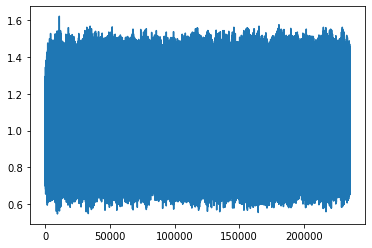

In [27]:
plt.plot(progress)

## nshot=1

In [31]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSAn1(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSAn1(i,theta,c1,delta)
        print(lossCaln1(i,theta))
        progress.append(lossCaln1(i,theta))
        thdata.append(theta)

2.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
0.0
2.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0


0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
0.0
2.0
2.0
0.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0


KeyboardInterrupt: 

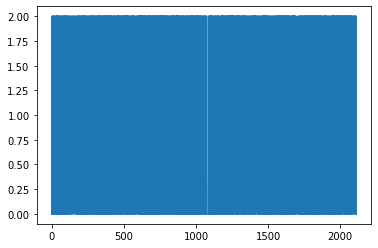

In [32]:
plt.plot(progress)

 ## Sigle data point n=1000

In [33]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    theta=theta+SPSA(1,theta,c1,delta)
    print(lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

1.31
1.388
1.326
1.3599999999999999
1.3639999999999999
1.318
1.3559999999999999
1.338
1.3599999999999999
1.3599999999999999
1.342
1.326
1.3639999999999999
1.34
1.3
1.35
1.414
1.3980000000000001
1.376
1.374
1.322
1.32
1.322
1.354
1.334
1.366
1.41
1.38
1.37
1.3900000000000001
1.3559999999999999
1.3519999999999999
1.342
1.392
1.35
1.318
1.38
1.3519999999999999
1.3639999999999999
1.326
1.328
1.3599999999999999
1.316
1.41
1.3479999999999999
1.3559999999999999
1.302
1.374
1.358
1.292
1.336
1.33
1.326
1.3780000000000001
1.3860000000000001
1.336
1.338
1.316
1.336
1.338
1.374
1.37
1.3479999999999999
1.354
1.376
1.3719999999999999
1.3820000000000001
1.3479999999999999
1.3599999999999999
1.33
1.33
1.3479999999999999
1.312
1.3479999999999999
1.354
1.34
1.35
1.27
1.3559999999999999
1.328
1.354
1.328
1.34
1.3599999999999999
1.362
1.3639999999999999
1.342
1.3439999999999999
1.392
1.338
1.37
1.392
1.346
1.362
1.3780000000000001
1.332
1.3519999999999999
1.33
1.3820000000000001
1.384
1.35
1.376
1.347999

1.318
1.268
1.346
1.33
1.286
1.3
1.324
1.3519999999999999
1.302
1.37
1.318
1.3519999999999999
1.288
1.334
1.3940000000000001
1.314
1.298
1.312
1.312
1.308
1.304
1.346
1.304
1.23
1.306
1.34
1.302
1.3639999999999999
1.332
1.37
1.3719999999999999
1.272
1.34
1.3479999999999999
1.384
1.332
1.318
1.276
1.302
1.252
1.286
1.324
1.294
1.32
1.312
1.312
1.326
1.336
1.292
1.332
1.336
1.332
1.33
1.316
1.286
1.314
1.318
1.276
1.3559999999999999
1.292
1.336
1.366
1.308
1.302
1.302
1.29
1.354
1.286
1.4020000000000001
1.33
1.308
1.346
1.3
1.314
1.3820000000000001
1.33
1.338
1.374
1.346
1.33
1.33
1.312
1.3519999999999999
1.362
1.354
1.326
1.336
1.314
1.312
1.342
1.33
1.35
1.3479999999999999
1.336
1.32
1.292
1.302
1.272
1.32
1.3559999999999999
1.312
1.34
1.358
1.314
1.3639999999999999
1.362
1.316
1.29
1.302
1.332
1.3519999999999999
1.34
1.34
1.286
1.338
1.34
1.342
1.346
1.268
1.324
1.34
1.31
1.27
1.366
1.338
1.296
1.358
1.286
1.29
1.34
1.34
1.318
1.324
1.304
1.322
1.354
1.326
1.304
1.294
1.34
1.343999999

1.226
1.182
1.134
1.126
1.142
1.124
1.1280000000000001
1.142
1.192
1.152
1.094
1.134
1.094
1.174
1.17
1.174
1.144
1.18
1.156
1.154
1.194
1.124
1.09
1.108
1.106
1.162
1.11
1.196
1.148
1.17
1.1320000000000001
1.154
1.176
1.1360000000000001
1.124
1.192
1.138
1.144
1.182
1.1280000000000001
1.16
1.13
1.164
1.182
1.178
1.13
1.154
1.2
1.162
1.144
1.152
1.168
1.17
1.108
1.12
1.158
1.11
1.196
1.1400000000000001
1.1320000000000001
1.168
1.15
1.096
1.154
1.18
1.1219999999999999
1.166
1.104
1.11
1.144
1.162
1.112
1.144
1.202
1.104
1.166
1.166
1.162
1.11
1.176
1.138
1.156
1.108
1.176
1.16
1.142
1.174
1.16
1.154
1.126
1.16
1.2
1.19
1.124
1.114
1.172
1.222
1.198
1.168
1.162
1.178
1.1280000000000001
1.142
1.202
1.134
1.172
1.12
1.176
1.152
1.08
1.126
1.1280000000000001
1.196
1.134
1.164
1.188
1.166
1.166
1.1320000000000001
1.138
1.096
1.12
1.11
1.142
1.152
1.2
1.176
1.15
1.156
1.116
1.142
1.1400000000000001
1.168
1.24
1.098
1.182
1.1320000000000001
1.146
1.134
1.228
1.134
1.18
1.11
1.146
1.162
1.12
1.

0.9359999999999999
0.97
1.008
0.886
0.846
0.97
0.98
0.966
0.948
0.954
0.9359999999999999
0.958
0.976
0.91
0.954
1.018
0.888
0.992
0.952
0.876
0.94
0.944
0.92
0.942
0.928
0.9319999999999999
0.92
0.948
0.916
0.9359999999999999
0.9359999999999999
0.94
0.942
0.892
0.9319999999999999
0.9339999999999999
0.9
0.918
0.96
0.952
0.97
0.922
0.952
0.94
0.888
0.908
0.966
0.948
0.87
0.924
0.922
0.958
0.968
0.956
0.912
0.954
0.864
0.908
0.914
0.878
0.968
0.912
0.92
0.91
0.912
0.912
0.892
0.974
0.898
0.938
0.9359999999999999
0.904
0.918
0.918
0.904
0.912
0.924
0.938
0.908
0.948
0.968
0.922
0.918
0.902
0.928
0.916
0.9359999999999999
0.956
0.988
0.892
0.946
0.912
0.91
0.974
0.948
0.9359999999999999
0.9339999999999999
0.898
0.906
0.9
0.958
0.946
0.924
0.912
0.9339999999999999
0.928
0.952
0.86
0.94
0.976
0.944
0.984
0.89
0.926
0.914
0.922
0.944
0.994
0.94
0.912
0.988
0.9359999999999999
0.894
0.928
0.904
0.926
0.914
0.898
0.928
0.952
0.948
0.886
0.978
0.922
0.876
0.946
0.9299999999999999
0.946
0.904
0.914
0

0.838
0.87
0.802
0.892
0.842
0.858
0.856
0.888
0.838
0.842
0.804
0.852
0.834
0.84
0.8280000000000001
0.8280000000000001
0.8220000000000001
0.752
0.798
0.844
0.85
0.868
0.866
0.804
0.86
0.844
0.882
0.898
0.88
0.796
0.8140000000000001
0.904
0.846
0.81
0.86
0.832
0.8180000000000001
0.808
0.856
0.812
0.856
0.798
0.878
0.8280000000000001
0.776
0.85
0.794
0.8160000000000001
0.856
0.8240000000000001
0.792
0.834
0.838
0.836
0.774
0.81
0.782
0.856
0.862
0.786
0.872
0.8
0.842
0.804
0.812
0.872
0.8220000000000001
0.78
0.854
0.84
0.8
0.796
0.846
0.832
0.832
0.8280000000000001
0.846
0.844
0.854
0.8140000000000001
0.79
0.88
0.768
0.84
0.862
0.8240000000000001
0.8
0.794
0.852
0.8200000000000001
0.8240000000000001
0.8280000000000001
0.888
0.842
0.834
0.842
0.8160000000000001
0.8280000000000001
0.784
0.792
0.906
0.8240000000000001
0.8220000000000001
0.8140000000000001
0.8140000000000001
0.806
0.83
0.804
0.8240000000000001
0.784
0.852
0.756
0.8160000000000001
0.848
0.764
0.794
0.846
0.772
0.804
0.808
0.

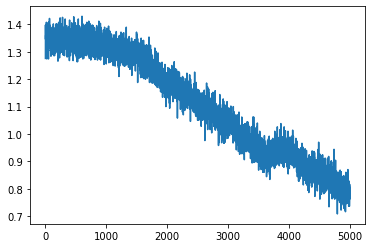

In [35]:
progress_c1001_delta6_ep5000=progress
plt.plot(progress_c1001_delta6_ep5000)

In [36]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(50000):
    theta=theta+SPSA(1,theta,c1,delta)
    print(lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0.996
1.012
0.984
0.9359999999999999
1.002
0.946
1.024
1.0
0.958
0.982
0.956
0.976
0.992
0.974
0.962
0.94
0.982
0.9299999999999999
1.016
0.9299999999999999
0.992
0.996
0.952
0.998
1.016
0.986
0.9299999999999999
1.01
1.026
0.978
0.978
0.964
0.996
0.992
1.002
0.978
0.986
1.014
0.982
0.938
0.942
0.956
0.982
0.928
0.986
0.96
0.974
0.946
0.926
1.024
1.028
0.97
0.972
0.948
0.94
0.9319999999999999
0.958
0.97
0.99
0.946
0.9359999999999999
0.946
0.942
0.958
1.002
0.98
0.906
0.962
0.994
0.938
0.99
0.942
1.008
0.948
0.99
0.994
0.918
0.976
0.966
0.982
1.06
1.008
0.948
0.946
0.944
1.004
0.978
0.96
0.978
0.98
0.924
1.052
0.948
1.002
0.9319999999999999
0.97
0.9359999999999999
0.992
0.994
0.976
0.966
0.998
0.95
0.9339999999999999
1.016
0.956
0.966
1.024
0.868
1.038
0.9359999999999999
0.942
0.962
0.994
1.0
0.97
1.014
0.944
0.944
1.004
0.9339999999999999
0.98
1.022
0.928
0.974
0.976
1.006
0.97
0.982
0.98
0.974
0.968
0.978
0.982
0.9319999999999999
0.898
0.972
0.958
0.996
0.95
0.948
0.964
0.918
0.942
0.98

0.742
0.81
0.746
0.756
0.852
0.844
0.8220000000000001
0.798
0.806
0.744
0.8260000000000001
0.85
0.784
0.782
0.8240000000000001
0.772
0.806
0.804
0.8220000000000001
0.792
0.838
0.776
0.8140000000000001
0.806
0.8220000000000001
0.806
0.77
0.8200000000000001
0.764
0.844
0.8180000000000001
0.812
0.756
0.792
0.724
0.762
0.8280000000000001
0.846
0.8280000000000001
0.8
0.8160000000000001
0.8260000000000001
0.802
0.854
0.784
0.804
0.794
0.796
0.83
0.84
0.8260000000000001
0.8220000000000001
0.77
0.846
0.786
0.77
0.748
0.8160000000000001
0.748
0.8240000000000001
0.792
0.8
0.79
0.736
0.778
0.776
0.762
0.724
0.792
0.772
0.83
0.808
0.802
0.802
0.81
0.834
0.798
0.802
0.762
0.874
0.784
0.8140000000000001
0.782
0.8280000000000001
0.8280000000000001
0.834
0.776
0.738
0.758
0.732
0.784
0.774
0.786
0.772
0.81
0.792
0.728
0.786
0.806
0.786
0.786
0.736
0.756
0.75
0.756
0.804
0.8160000000000001
0.8220000000000001
0.78
0.834
0.776
0.81
0.846
0.786
0.778
0.858
0.784
0.8280000000000001
0.8200000000000001
0.738

0.714
0.654
0.688
0.722
0.636
0.718
0.6759999999999999
0.718
0.696
0.696
0.732
0.722
0.716
0.644
0.73
0.7
0.654
0.718
0.656
0.692
0.618
0.6619999999999999
0.6639999999999999
0.6699999999999999
0.646
0.736
0.706
0.694
0.732
0.706
0.698
0.698
0.694
0.6859999999999999
0.704
0.652
0.724
0.6679999999999999
0.65
0.742
0.692
0.6839999999999999
0.692
0.6739999999999999
0.72
0.69
0.71
0.724
0.706
0.712
0.6839999999999999
0.73
0.716
0.694
0.71
0.6819999999999999
0.6639999999999999
0.724
0.6619999999999999
0.76
0.698
0.688
0.692
0.688
0.744
0.7
0.688
0.704
0.718
0.652
0.6779999999999999
0.6819999999999999
0.704
0.6759999999999999
0.636
0.732
0.6739999999999999
0.6779999999999999
0.6799999999999999
0.6759999999999999
0.712
0.692
0.7
0.692
0.774
0.6699999999999999
0.694
0.696
0.64
0.634
0.6859999999999999
0.6699999999999999
0.692
0.6859999999999999
0.698
0.654
0.704
0.702
0.712
0.71
0.6839999999999999
0.698
0.72
0.708
0.712
0.6739999999999999
0.694
0.698
0.6719999999999999
0.632
0.644
0.67799999999

0.718
0.708
0.7
0.6659999999999999
0.702
0.696
0.634
0.6639999999999999
0.6799999999999999
0.702
0.706
0.626
0.6599999999999999
0.652
0.706
0.732
0.692
0.656
0.6839999999999999
0.6739999999999999
0.652
0.694
0.708
0.698
0.706
0.6799999999999999
0.6759999999999999
0.6599999999999999
0.646
0.656
0.698
0.702
0.708
0.6619999999999999
0.6739999999999999
0.716
0.7
0.724
0.6639999999999999
0.6639999999999999
0.6759999999999999
0.6719999999999999
0.6619999999999999
0.628
0.688
0.73
0.694
0.6839999999999999
0.6579999999999999
0.722
0.6699999999999999
0.692
0.714
0.718
0.646
0.696
0.648
0.712
0.702
0.6579999999999999
0.728
0.742
0.694
0.6679999999999999
0.706
0.726
0.654
0.6839999999999999
0.64
0.6739999999999999
0.6679999999999999
0.6699999999999999
0.6819999999999999
0.6579999999999999
0.746
0.5900000000000001
0.692
0.722
0.654
0.6699999999999999
0.6819999999999999
0.694
0.71
0.752
0.71
0.69
0.71
0.706
0.65
0.708
0.706
0.7
0.642
0.6799999999999999
0.72
0.6719999999999999
0.71
0.657999999999999

0.704
0.696
0.694
0.702
0.6579999999999999
0.732
0.6819999999999999
0.6799999999999999
0.696
0.6639999999999999
0.7
0.692
0.696
0.692
0.71
0.728
0.71
0.698
0.7
0.728
0.712
0.698
0.6579999999999999
0.702
0.692
0.688
0.6799999999999999
0.6779999999999999
0.6819999999999999
0.6819999999999999
0.734
0.694
0.694
0.732
0.6759999999999999
0.6839999999999999
0.73
0.656
0.65
0.6659999999999999
0.712
0.688
0.6619999999999999
0.726
0.6679999999999999
0.718
0.6839999999999999
0.6859999999999999
0.6579999999999999
0.6799999999999999
0.74
0.688
0.6659999999999999
0.704
0.71
0.73
0.714
0.6759999999999999
0.6839999999999999
0.6659999999999999
0.6719999999999999
0.642
0.688
0.698
0.774
0.718
0.7
0.75
0.6719999999999999
0.746
0.718
0.6739999999999999
0.762
0.6599999999999999
0.6579999999999999
0.712
0.704
0.6819999999999999
0.652
0.704
0.6839999999999999
0.638
0.72
0.694
0.632
0.6679999999999999
0.6839999999999999
0.694
0.732
0.6839999999999999
0.6679999999999999
0.6719999999999999
0.768
0.74
0.74
0.685

0.716
0.696
0.742
0.756
0.694
0.714
0.69
0.724
0.6579999999999999
0.6839999999999999
0.69
0.69
0.698
0.62
0.714
0.728
0.6839999999999999
0.6659999999999999
0.706
0.704
0.742
0.734
0.6719999999999999
0.748
0.6599999999999999
0.73
0.65
0.6659999999999999
0.712
0.722
0.696
0.6579999999999999
0.6839999999999999
0.706
0.6759999999999999
0.6739999999999999
0.6759999999999999
0.72
0.718
0.654
0.6639999999999999
0.698
0.6859999999999999
0.648
0.712
0.656
0.6719999999999999
0.71
0.6859999999999999
0.69
0.704
0.6719999999999999
0.6799999999999999
0.69
0.652
0.714
0.696
0.6859999999999999
0.706
0.64
0.6779999999999999
0.72
0.692
0.706
0.6739999999999999
0.6779999999999999
0.702
0.6759999999999999
0.7
0.694
0.694
0.6719999999999999
0.718
0.7
0.6679999999999999
0.6799999999999999
0.72
0.738
0.6739999999999999
0.748
0.7
0.696
0.722
0.6599999999999999
0.716
0.702
0.732
0.6659999999999999
0.726
0.6859999999999999
0.6799999999999999
0.704
0.64
0.6739999999999999
0.732
0.6779999999999999
0.688
0.644
0.6

0.704
0.726
0.718
0.708
0.6679999999999999
0.724
0.718
0.696
0.646
0.734
0.706
0.71
0.694
0.706
0.718
0.646
0.72
0.6839999999999999
0.696
0.646
0.738
0.6779999999999999
0.656
0.706
0.72
0.6859999999999999
0.714
0.714
0.692
0.72
0.6639999999999999
0.688
0.6739999999999999
0.73
0.698
0.744
0.692
0.6819999999999999
0.6799999999999999
0.71
0.652
0.63
0.69
0.6779999999999999
0.7
0.6599999999999999
0.6759999999999999
0.724
0.778
0.6779999999999999
0.744
0.6859999999999999
0.754
0.6839999999999999
0.688
0.716
0.694
0.702
0.704
0.724
0.654
0.6839999999999999
0.734
0.748
0.69
0.716
0.696
0.692
0.712
0.772
0.6839999999999999
0.6759999999999999
0.692
0.72
0.798
0.722
0.712
0.65
0.656
0.71
0.708
0.63
0.696
0.628
0.722
0.6679999999999999
0.718
0.712
0.734
0.74
0.726
0.69
0.6639999999999999
0.69
0.738
0.6699999999999999
0.6759999999999999
0.724
0.706
0.712
0.692
0.6779999999999999
0.722
0.688
0.734
0.718
0.6759999999999999
0.644
0.64
0.724
0.724
0.704
0.722
0.766
0.704
0.69
0.6699999999999999
0.722


0.72
0.6619999999999999
0.73
0.69
0.688
0.6819999999999999
0.702
0.748
0.6859999999999999
0.734
0.692
0.6799999999999999
0.7
0.6839999999999999
0.688
0.696
0.6739999999999999
0.712
0.6779999999999999
0.712
0.776
0.71
0.754
0.7
0.6679999999999999
0.712
0.734
0.688
0.708
0.69
0.688
0.718
0.6799999999999999
0.6679999999999999
0.652
0.728
0.72
0.692
0.6639999999999999
0.73
0.6759999999999999
0.756
0.698
0.706
0.6659999999999999
0.644
0.708
0.728
0.714
0.712
0.724
0.712
0.72
0.698
0.728
0.696
0.692
0.74
0.706
0.6799999999999999
0.722
0.73
0.654
0.71
0.75
0.6699999999999999
0.746
0.752
0.73
0.6679999999999999
0.704
0.628
0.708
0.71
0.744
0.654
0.736
0.6699999999999999
0.734
0.812
0.694
0.6679999999999999
0.732
0.6839999999999999
0.634
0.716
0.6759999999999999
0.69
0.718
0.702
0.712
0.718
0.6599999999999999
0.704
0.734
0.606
0.638
0.6759999999999999
0.71
0.6739999999999999
0.718
0.656
0.6679999999999999
0.738
0.69
0.736
0.714
0.69
0.716
0.6839999999999999
0.732
0.69
0.732
0.6599999999999999
0

0.72
0.748
0.6799999999999999
0.694
0.744
0.724
0.722
0.74
0.75
0.706
0.776
0.754
0.728
0.728
0.698
0.728
0.74
0.762
0.69
0.76
0.716
0.738
0.726
0.722
0.69
0.742
0.742
0.6799999999999999
0.738
0.712
0.728
0.692
0.756
0.616
0.71
0.708
0.692
0.712
0.732
0.78
0.7
0.76
0.74
0.6759999999999999
0.74
0.744
0.734
0.704
0.696
0.756
0.734
0.794
0.784
0.736
0.744
0.704
0.6579999999999999
0.738
0.758
0.726
0.694
0.72
0.7
0.724
0.732
0.772
0.714
0.716
0.738
0.6779999999999999
0.784
0.752
0.702
0.722
0.698
0.6699999999999999
0.716
0.6779999999999999
0.716
0.6779999999999999
0.6839999999999999
0.6639999999999999
0.694
0.724
0.74
0.736
0.71
0.71
0.6819999999999999
0.704
0.774
0.724
0.756
0.77
0.758
0.722
0.762
0.73
0.768
0.732
0.724
0.764
0.746
0.742
0.716
0.724
0.71
0.71
0.722
0.724
0.708
0.71
0.748
0.804
0.748
0.768
0.6839999999999999
0.742
0.718
0.738
0.72
0.724
0.7
0.716
0.716
0.698
0.722
0.732
0.772
0.716
0.716
0.802
0.718
0.772
0.764
0.6859999999999999
0.744
0.742
0.738
0.738
0.74
0.706
0.738
0.

0.736
0.752
0.758
0.698
0.72
0.714
0.6739999999999999
0.738
0.746
0.706
0.774
0.704
0.73
0.718
0.754
0.754
0.6819999999999999
0.688
0.734
0.708
0.746
0.748
0.706
0.708
0.656
0.69
0.6659999999999999
0.718
0.696
0.6779999999999999
0.6799999999999999
0.6819999999999999
0.724
0.6779999999999999
0.718
0.754
0.6799999999999999
0.6779999999999999
0.6759999999999999
0.638
0.694
0.6739999999999999
0.726
0.726
0.696
0.706
0.7
0.756
0.688
0.724
0.748
0.728
0.768
0.7
0.692
0.694
0.6819999999999999
0.704
0.724
0.764
0.734
0.7
0.748
0.696
0.736
0.73
0.752
0.688
0.762
0.694
0.6739999999999999
0.698
0.726
0.728
0.6759999999999999
0.704
0.712
0.6719999999999999
0.728
0.71
0.694
0.656
0.694
0.6639999999999999
0.6819999999999999
0.694
0.712
0.724
0.742
0.71
0.718
0.75
0.688
0.656
0.694
0.704
0.718
0.726
0.694
0.6739999999999999
0.712
0.6799999999999999
0.744
0.6819999999999999
0.6739999999999999
0.6759999999999999
0.786
0.774
0.712
0.736
0.736
0.754
0.712
0.694
0.696
0.692
0.712
0.73
0.734
0.716
0.71
0.7

0.6819999999999999
0.6839999999999999
0.704
0.6759999999999999
0.704
0.742
0.6739999999999999
0.698
0.73
0.726
0.734
0.726
0.752
0.6859999999999999
0.72
0.654
0.742
0.6759999999999999
0.694
0.638
0.756
0.6819999999999999
0.698
0.7
0.746
0.6599999999999999
0.6699999999999999
0.766
0.736
0.694
0.702
0.734
0.714
0.706
0.71
0.646
0.688
0.6639999999999999
0.6759999999999999
0.6599999999999999
0.6859999999999999
0.71
0.6739999999999999
0.6859999999999999
0.754
0.71
0.74
0.714
0.724
0.694
0.688
0.6859999999999999
0.6599999999999999
0.6819999999999999
0.748
0.6819999999999999
0.698
0.744
0.702
0.6659999999999999
0.724
0.6659999999999999
0.704
0.708
0.634
0.6639999999999999
0.716
0.72
0.72
0.73
0.692
0.708
0.702
0.69
0.694
0.708
0.7
0.696
0.72
0.734
0.6739999999999999
0.6679999999999999
0.6839999999999999
0.712
0.6739999999999999
0.71
0.706
0.698
0.732
0.718
0.6839999999999999
0.646
0.6699999999999999
0.6839999999999999
0.694
0.698
0.73
0.74
0.69
0.734
0.704
0.726
0.75
0.688
0.754
0.704
0.716
0

0.688
0.714
0.762
0.704
0.71
0.734
0.714
0.722
0.65
0.702
0.704
0.738
0.722
0.74
0.6839999999999999
0.74
0.76
0.692
0.708
0.77
0.702
0.6719999999999999
0.712
0.776
0.6639999999999999
0.722
0.692
0.728
0.71
0.698
0.728
0.718
0.69
0.708
0.696
0.706
0.73
0.766
0.74
0.77
0.702
0.688
0.732
0.738
0.696
0.744
0.696
0.6679999999999999
0.784
0.756
0.692
0.752
0.738
0.7
0.72
0.714
0.734
0.716
0.746
0.74
0.766
0.754
0.742
0.742
0.722
0.6819999999999999
0.698
0.716
0.754
0.732
0.726
0.6839999999999999
0.75
0.73
0.698
0.6859999999999999
0.714
0.738
0.706
0.748
0.7
0.728
0.722
0.764
0.728
0.6779999999999999
0.724
0.772
0.742
0.724
0.748
0.6739999999999999
0.6839999999999999
0.754
0.762
0.736
0.716
0.694
0.718
0.73
0.724
0.71
0.77
0.726
0.71
0.722
0.74
0.78
0.6679999999999999
0.72
0.708
0.712
0.756
0.714
0.728
0.6679999999999999
0.744
0.742
0.6839999999999999
0.718
0.704
0.752
0.724
0.6799999999999999
0.726
0.72
0.6579999999999999
0.694
0.714
0.782
0.74
0.75
0.718
0.6779999999999999
0.702
0.748
0.7
0

0.646
0.744
0.72
0.704
0.75
0.72
0.712
0.6839999999999999
0.696
0.6639999999999999
0.6719999999999999
0.718
0.746
0.722
0.696
0.718
0.6799999999999999
0.736
0.708
0.696
0.726
0.708
0.706
0.706
0.718
0.754
0.736
0.692
0.648
0.69
0.716
0.6659999999999999
0.702
0.756
0.6859999999999999
0.6799999999999999
0.748
0.692
0.746
0.712
0.718
0.6739999999999999
0.714
0.694
0.718
0.704
0.6839999999999999
0.748
0.69
0.73
0.784
0.708
0.718
0.728
0.6779999999999999
0.706
0.6779999999999999
0.694
0.692
0.71
0.71
0.726
0.708
0.754
0.714
0.784
0.696
0.746
0.738
0.642
0.656
0.756
0.694
0.6679999999999999
0.6759999999999999
0.694
0.728
0.732
0.744
0.704
0.72
0.752
0.752
0.748
0.72
0.726
0.6599999999999999
0.766
0.6839999999999999
0.69
0.716
0.766
0.712
0.75
0.702
0.7
0.7
0.6719999999999999
0.726
0.69
0.62
0.764
0.694
0.748
0.708
0.694
0.6779999999999999
0.734
0.726
0.694
0.736
0.688
0.6839999999999999
0.6779999999999999
0.688
0.6799999999999999
0.654
0.696
0.644
0.72
0.694
0.718
0.6699999999999999
0.736
0.

0.752
0.756
0.714
0.752
0.73
0.754
0.73
0.782
0.734
0.736
0.736
0.72
0.688
0.746
0.794
0.69
0.786
0.774
0.758
0.6779999999999999
0.694
0.748
0.754
0.732
0.738
0.734
0.736
0.806
0.752
0.788
0.726
0.736
0.746
0.77
0.716
0.77
0.728
0.794
0.764
0.746
0.746
0.7
0.732
0.8
0.728
0.728
0.716
0.718
0.728
0.736
0.782
0.742
0.712
0.704
0.758
0.708
0.744
0.754
0.772
0.728
0.786
0.752
0.764
0.734
0.718
0.692
0.654
0.732
0.754
0.72
0.756
0.756
0.774
0.726
0.736
0.714
0.738
0.778
0.758
0.756
0.72
0.734
0.736
0.716
0.794
0.726
0.718
0.72
0.7
0.6839999999999999
0.708
0.752
0.706
0.712
0.74
0.6779999999999999
0.712
0.778
0.706
0.77
0.734
0.798
0.748
0.762
0.726
0.748
0.754
0.744
0.71
0.728
0.704
0.72
0.6819999999999999
0.692
0.714
0.73
0.736
0.76
0.702
0.766
0.7
0.738
0.778
0.732
0.73
0.75
0.71
0.688
0.724
0.75
0.722
0.734
0.752
0.7
0.754
0.72
0.6619999999999999
0.79
0.7
0.724
0.722
0.7
0.69
0.706
0.704
0.748
0.746
0.708
0.712
0.734
0.704
0.76
0.708
0.706
0.712
0.702
0.758
0.73
0.746
0.6859999999999999


0.71
0.6599999999999999
0.71
0.6839999999999999
0.734
0.7
0.722
0.734
0.716
0.6839999999999999
0.688
0.6799999999999999
0.6839999999999999
0.75
0.694
0.6839999999999999
0.6839999999999999
0.708
0.71
0.786
0.706
0.688
0.6839999999999999
0.72
0.6679999999999999
0.6639999999999999
0.71
0.64
0.6679999999999999
0.6719999999999999
0.742
0.6739999999999999
0.6839999999999999
0.646
0.646
0.692
0.642
0.718
0.6579999999999999
0.726
0.7
0.728
0.714
0.6659999999999999
0.738
0.74
0.708
0.654
0.698
0.6779999999999999
0.6699999999999999
0.6779999999999999
0.6799999999999999
0.6659999999999999
0.696
0.728
0.704
0.692
0.718
0.6859999999999999
0.72
0.6799999999999999
0.6859999999999999
0.6799999999999999
0.638
0.634
0.6599999999999999
0.702
0.6699999999999999
0.698
0.6619999999999999
0.6759999999999999
0.642
0.6699999999999999
0.6839999999999999
0.71
0.732
0.724
0.61
0.6719999999999999
0.688
0.6859999999999999
0.6819999999999999
0.69
0.6699999999999999
0.71
0.6639999999999999
0.6619999999999999
0.685999

0.774
0.722
0.726
0.718
0.764
0.694
0.694
0.756
0.724
0.722
0.724
0.73
0.692
0.696
0.796
0.726
0.6839999999999999
0.73
0.656
0.728
0.744
0.774
0.706
0.702
0.748
0.718
0.726
0.742
0.698
0.71
0.716
0.778
0.692
0.772
0.708
0.73
0.698
0.708
0.78
0.762
0.724
0.7
0.706
0.78
0.786
0.6819999999999999
0.702
0.688
0.6679999999999999
0.69
0.654
0.704
0.724
0.756
0.708
0.742
0.744
0.708
0.754
0.726
0.7
0.748
0.694
0.73
0.728
0.786
0.652
0.736
0.748
0.728
0.736
0.71
0.704
0.6819999999999999
0.76
0.71
0.6799999999999999
0.796
0.736
0.74
0.73
0.718
0.748
0.738
0.748
0.704
0.702
0.772
0.736
0.74
0.724
0.71
0.7
0.742
0.6719999999999999
0.738
0.714
0.75
0.72
0.6859999999999999
0.698
0.6739999999999999
0.73
0.77
0.748
0.766
0.732
0.718
0.738
0.6759999999999999
0.748
0.72
0.722
0.722
0.6739999999999999
0.702
0.718
0.802
0.712
0.712
0.6639999999999999
0.776
0.758
0.74
0.6799999999999999
0.692
0.704
0.79
0.764
0.722
0.73
0.712
0.738
0.734
0.758
0.756
0.78
0.722
0.754
0.702
0.712
0.752
0.736
0.806
0.72
0.75


KeyboardInterrupt: 

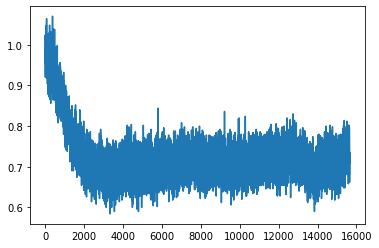

In [37]:
progress_c1001_delta6_ep50000=progress
plt.plot(progress_c1001_delta6_ep50000)

In [39]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.randint(1, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print(ep,"th iteration L=",lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0 th iteration L= 0.994
1 th iteration L= 0.96
2 th iteration L= 0.962
3 th iteration L= 0.958
4 th iteration L= 1.03
5 th iteration L= 0.902
6 th iteration L= 0.95
7 th iteration L= 1.022
8 th iteration L= 0.982
9 th iteration L= 0.972
10 th iteration L= 0.974
11 th iteration L= 1.004
12 th iteration L= 0.954
13 th iteration L= 0.938
14 th iteration L= 1.0
15 th iteration L= 0.988
16 th iteration L= 1.002
17 th iteration L= 1.056
18 th iteration L= 0.996
19 th iteration L= 0.986
20 th iteration L= 0.992
21 th iteration L= 0.968
22 th iteration L= 0.966
23 th iteration L= 1.006
24 th iteration L= 1.0
25 th iteration L= 1.014
26 th iteration L= 0.974
27 th iteration L= 1.0
28 th iteration L= 0.988
29 th iteration L= 0.964
30 th iteration L= 1.012
31 th iteration L= 0.964
32 th iteration L= 1.006
33 th iteration L= 0.958
34 th iteration L= 0.974
35 th iteration L= 0.972
36 th iteration L= 0.974
37 th iteration L= 0.976
38 th iteration L= 1.006
39 th iteration L= 0.95
40 th iteration L= 1

314 th iteration L= 0.906
315 th iteration L= 0.912
316 th iteration L= 0.91
317 th iteration L= 0.962
318 th iteration L= 0.94
319 th iteration L= 0.944
320 th iteration L= 0.908
321 th iteration L= 0.9
322 th iteration L= 0.9359999999999999
323 th iteration L= 0.982
324 th iteration L= 0.85
325 th iteration L= 0.886
326 th iteration L= 0.9299999999999999
327 th iteration L= 0.898
328 th iteration L= 0.908
329 th iteration L= 0.904
330 th iteration L= 0.966
331 th iteration L= 0.94
332 th iteration L= 0.986
333 th iteration L= 0.876
334 th iteration L= 0.964
335 th iteration L= 0.92
336 th iteration L= 0.884
337 th iteration L= 0.95
338 th iteration L= 0.886
339 th iteration L= 0.914
340 th iteration L= 0.998
341 th iteration L= 0.902
342 th iteration L= 0.972
343 th iteration L= 0.92
344 th iteration L= 0.928
345 th iteration L= 0.888
346 th iteration L= 0.9
347 th iteration L= 0.94
348 th iteration L= 0.9
349 th iteration L= 0.874
350 th iteration L= 0.94
351 th iteration L= 0.948
3

620 th iteration L= 0.842
621 th iteration L= 0.856
622 th iteration L= 0.91
623 th iteration L= 0.918
624 th iteration L= 0.898
625 th iteration L= 0.85
626 th iteration L= 0.846
627 th iteration L= 0.874
628 th iteration L= 0.882
629 th iteration L= 0.83
630 th iteration L= 0.87
631 th iteration L= 0.804
632 th iteration L= 0.852
633 th iteration L= 0.806
634 th iteration L= 0.8140000000000001
635 th iteration L= 0.798
636 th iteration L= 0.87
637 th iteration L= 0.908
638 th iteration L= 0.86
639 th iteration L= 0.872
640 th iteration L= 0.808
641 th iteration L= 0.8280000000000001
642 th iteration L= 0.906
643 th iteration L= 0.848
644 th iteration L= 0.8160000000000001
645 th iteration L= 0.836
646 th iteration L= 0.872
647 th iteration L= 0.844
648 th iteration L= 0.8240000000000001
649 th iteration L= 0.812
650 th iteration L= 0.888
651 th iteration L= 0.908
652 th iteration L= 0.8200000000000001
653 th iteration L= 0.8280000000000001
654 th iteration L= 0.85
655 th iteration L=

912 th iteration L= 0.714
913 th iteration L= 0.8140000000000001
914 th iteration L= 0.758
915 th iteration L= 0.702
916 th iteration L= 0.772
917 th iteration L= 0.8180000000000001
918 th iteration L= 0.742
919 th iteration L= 0.778
920 th iteration L= 0.772
921 th iteration L= 0.778
922 th iteration L= 0.782
923 th iteration L= 0.77
924 th iteration L= 0.768
925 th iteration L= 0.76
926 th iteration L= 0.81
927 th iteration L= 0.77
928 th iteration L= 0.77
929 th iteration L= 0.752
930 th iteration L= 0.8
931 th iteration L= 0.698
932 th iteration L= 0.778
933 th iteration L= 0.788
934 th iteration L= 0.726
935 th iteration L= 0.83
936 th iteration L= 0.792
937 th iteration L= 0.792
938 th iteration L= 0.756
939 th iteration L= 0.762
940 th iteration L= 0.81
941 th iteration L= 0.812
942 th iteration L= 0.768
943 th iteration L= 0.728
944 th iteration L= 0.8
945 th iteration L= 0.76
946 th iteration L= 0.776
947 th iteration L= 0.716
948 th iteration L= 0.764
949 th iteration L= 0.77

1214 th iteration L= 0.712
1215 th iteration L= 0.746
1216 th iteration L= 0.776
1217 th iteration L= 0.788
1218 th iteration L= 0.784
1219 th iteration L= 0.788
1220 th iteration L= 0.774
1221 th iteration L= 0.778
1222 th iteration L= 0.832
1223 th iteration L= 0.762
1224 th iteration L= 0.716
1225 th iteration L= 0.8200000000000001
1226 th iteration L= 0.758
1227 th iteration L= 0.73
1228 th iteration L= 0.756
1229 th iteration L= 0.766
1230 th iteration L= 0.742
1231 th iteration L= 0.738
1232 th iteration L= 0.756
1233 th iteration L= 0.74
1234 th iteration L= 0.758
1235 th iteration L= 0.774
1236 th iteration L= 0.8200000000000001
1237 th iteration L= 0.802
1238 th iteration L= 0.806
1239 th iteration L= 0.78
1240 th iteration L= 0.786
1241 th iteration L= 0.804
1242 th iteration L= 0.8180000000000001
1243 th iteration L= 0.802
1244 th iteration L= 0.8
1245 th iteration L= 0.762
1246 th iteration L= 0.8
1247 th iteration L= 0.764
1248 th iteration L= 0.75
1249 th iteration L= 0.7

1512 th iteration L= 0.724
1513 th iteration L= 0.744
1514 th iteration L= 0.718
1515 th iteration L= 0.746
1516 th iteration L= 0.742
1517 th iteration L= 0.76
1518 th iteration L= 0.718
1519 th iteration L= 0.724
1520 th iteration L= 0.704
1521 th iteration L= 0.6599999999999999
1522 th iteration L= 0.75
1523 th iteration L= 0.694
1524 th iteration L= 0.6859999999999999
1525 th iteration L= 0.688
1526 th iteration L= 0.732
1527 th iteration L= 0.6779999999999999
1528 th iteration L= 0.75
1529 th iteration L= 0.72
1530 th iteration L= 0.772
1531 th iteration L= 0.74
1532 th iteration L= 0.746
1533 th iteration L= 0.698
1534 th iteration L= 0.6739999999999999
1535 th iteration L= 0.6819999999999999
1536 th iteration L= 0.722
1537 th iteration L= 0.748
1538 th iteration L= 0.706
1539 th iteration L= 0.6779999999999999
1540 th iteration L= 0.6679999999999999
1541 th iteration L= 0.724
1542 th iteration L= 0.744
1543 th iteration L= 0.6699999999999999
1544 th iteration L= 0.708
1545 th it

1789 th iteration L= 0.728
1790 th iteration L= 0.656
1791 th iteration L= 0.71
1792 th iteration L= 0.698
1793 th iteration L= 0.6579999999999999
1794 th iteration L= 0.748
1795 th iteration L= 0.712
1796 th iteration L= 0.702
1797 th iteration L= 0.696
1798 th iteration L= 0.636
1799 th iteration L= 0.712
1800 th iteration L= 0.692
1801 th iteration L= 0.698
1802 th iteration L= 0.778
1803 th iteration L= 0.694
1804 th iteration L= 0.692
1805 th iteration L= 0.75
1806 th iteration L= 0.716
1807 th iteration L= 0.69
1808 th iteration L= 0.688
1809 th iteration L= 0.732
1810 th iteration L= 0.644
1811 th iteration L= 0.688
1812 th iteration L= 0.6739999999999999
1813 th iteration L= 0.6659999999999999
1814 th iteration L= 0.714
1815 th iteration L= 0.692
1816 th iteration L= 0.744
1817 th iteration L= 0.656
1818 th iteration L= 0.6819999999999999
1819 th iteration L= 0.702
1820 th iteration L= 0.724
1821 th iteration L= 0.718
1822 th iteration L= 0.71
1823 th iteration L= 0.72
1824 th 

2068 th iteration L= 0.7
2069 th iteration L= 0.6759999999999999
2070 th iteration L= 0.718
2071 th iteration L= 0.726
2072 th iteration L= 0.6659999999999999
2073 th iteration L= 0.71
2074 th iteration L= 0.6739999999999999
2075 th iteration L= 0.712
2076 th iteration L= 0.6839999999999999
2077 th iteration L= 0.722
2078 th iteration L= 0.702
2079 th iteration L= 0.6819999999999999
2080 th iteration L= 0.696
2081 th iteration L= 0.694
2082 th iteration L= 0.688
2083 th iteration L= 0.722
2084 th iteration L= 0.714
2085 th iteration L= 0.6799999999999999
2086 th iteration L= 0.72
2087 th iteration L= 0.726
2088 th iteration L= 0.72
2089 th iteration L= 0.6799999999999999
2090 th iteration L= 0.716
2091 th iteration L= 0.746
2092 th iteration L= 0.6859999999999999
2093 th iteration L= 0.694
2094 th iteration L= 0.6719999999999999
2095 th iteration L= 0.746
2096 th iteration L= 0.754
2097 th iteration L= 0.7
2098 th iteration L= 0.726
2099 th iteration L= 0.716
2100 th iteration L= 0.696

2350 th iteration L= 0.6779999999999999
2351 th iteration L= 0.744
2352 th iteration L= 0.732
2353 th iteration L= 0.698
2354 th iteration L= 0.698
2355 th iteration L= 0.65
2356 th iteration L= 0.6739999999999999
2357 th iteration L= 0.692
2358 th iteration L= 0.718
2359 th iteration L= 0.72
2360 th iteration L= 0.718
2361 th iteration L= 0.6839999999999999
2362 th iteration L= 0.716
2363 th iteration L= 0.696
2364 th iteration L= 0.694
2365 th iteration L= 0.74
2366 th iteration L= 0.734
2367 th iteration L= 0.706
2368 th iteration L= 0.714
2369 th iteration L= 0.736
2370 th iteration L= 0.756
2371 th iteration L= 0.694
2372 th iteration L= 0.712
2373 th iteration L= 0.654
2374 th iteration L= 0.714
2375 th iteration L= 0.734
2376 th iteration L= 0.736
2377 th iteration L= 0.718
2378 th iteration L= 0.6639999999999999
2379 th iteration L= 0.722
2380 th iteration L= 0.728
2381 th iteration L= 0.732
2382 th iteration L= 0.728
2383 th iteration L= 0.74
2384 th iteration L= 0.714
2385 th

2638 th iteration L= 0.752
2639 th iteration L= 0.76
2640 th iteration L= 0.766
2641 th iteration L= 0.742
2642 th iteration L= 0.776
2643 th iteration L= 0.728
2644 th iteration L= 0.76
2645 th iteration L= 0.758
2646 th iteration L= 0.736
2647 th iteration L= 0.77
2648 th iteration L= 0.702
2649 th iteration L= 0.768
2650 th iteration L= 0.6579999999999999
2651 th iteration L= 0.692
2652 th iteration L= 0.712
2653 th iteration L= 0.75
2654 th iteration L= 0.752
2655 th iteration L= 0.748
2656 th iteration L= 0.754
2657 th iteration L= 0.744
2658 th iteration L= 0.754
2659 th iteration L= 0.754
2660 th iteration L= 0.692
2661 th iteration L= 0.75
2662 th iteration L= 0.718
2663 th iteration L= 0.724
2664 th iteration L= 0.75
2665 th iteration L= 0.748
2666 th iteration L= 0.794
2667 th iteration L= 0.734
2668 th iteration L= 0.758
2669 th iteration L= 0.716
2670 th iteration L= 0.714
2671 th iteration L= 0.732
2672 th iteration L= 0.754
2673 th iteration L= 0.706
2674 th iteration L= 

2922 th iteration L= 0.742
2923 th iteration L= 0.646
2924 th iteration L= 0.712
2925 th iteration L= 0.6659999999999999
2926 th iteration L= 0.766
2927 th iteration L= 0.714
2928 th iteration L= 0.734
2929 th iteration L= 0.696
2930 th iteration L= 0.746
2931 th iteration L= 0.7
2932 th iteration L= 0.6859999999999999
2933 th iteration L= 0.714
2934 th iteration L= 0.718
2935 th iteration L= 0.732
2936 th iteration L= 0.732
2937 th iteration L= 0.732
2938 th iteration L= 0.72
2939 th iteration L= 0.6579999999999999
2940 th iteration L= 0.716
2941 th iteration L= 0.6799999999999999
2942 th iteration L= 0.69
2943 th iteration L= 0.718
2944 th iteration L= 0.6719999999999999
2945 th iteration L= 0.704
2946 th iteration L= 0.718
2947 th iteration L= 0.698
2948 th iteration L= 0.716
2949 th iteration L= 0.692
2950 th iteration L= 0.69
2951 th iteration L= 0.72
2952 th iteration L= 0.6839999999999999
2953 th iteration L= 0.6859999999999999
2954 th iteration L= 0.6779999999999999
2955 th ite

3188 th iteration L= 0.688
3189 th iteration L= 0.688
3190 th iteration L= 0.706
3191 th iteration L= 0.724
3192 th iteration L= 0.644
3193 th iteration L= 0.6699999999999999
3194 th iteration L= 0.7
3195 th iteration L= 0.696
3196 th iteration L= 0.6859999999999999
3197 th iteration L= 0.6859999999999999
3198 th iteration L= 0.696
3199 th iteration L= 0.656
3200 th iteration L= 0.704
3201 th iteration L= 0.62
3202 th iteration L= 0.716
3203 th iteration L= 0.776
3204 th iteration L= 0.708
3205 th iteration L= 0.706
3206 th iteration L= 0.72
3207 th iteration L= 0.696
3208 th iteration L= 0.758
3209 th iteration L= 0.6679999999999999
3210 th iteration L= 0.748
3211 th iteration L= 0.726
3212 th iteration L= 0.702
3213 th iteration L= 0.688
3214 th iteration L= 0.772
3215 th iteration L= 0.766
3216 th iteration L= 0.6839999999999999
3217 th iteration L= 0.698
3218 th iteration L= 0.712
3219 th iteration L= 0.728
3220 th iteration L= 0.706
3221 th iteration L= 0.6699999999999999
3222 th 

3471 th iteration L= 0.6799999999999999
3472 th iteration L= 0.7
3473 th iteration L= 0.798
3474 th iteration L= 0.632
3475 th iteration L= 0.6739999999999999
3476 th iteration L= 0.698
3477 th iteration L= 0.758
3478 th iteration L= 0.726
3479 th iteration L= 0.722
3480 th iteration L= 0.732
3481 th iteration L= 0.694
3482 th iteration L= 0.702
3483 th iteration L= 0.6779999999999999
3484 th iteration L= 0.6679999999999999
3485 th iteration L= 0.708
3486 th iteration L= 0.692
3487 th iteration L= 0.69
3488 th iteration L= 0.728
3489 th iteration L= 0.6639999999999999
3490 th iteration L= 0.6779999999999999
3491 th iteration L= 0.69
3492 th iteration L= 0.6579999999999999
3493 th iteration L= 0.6679999999999999
3494 th iteration L= 0.7
3495 th iteration L= 0.694
3496 th iteration L= 0.698
3497 th iteration L= 0.694
3498 th iteration L= 0.756
3499 th iteration L= 0.704
3500 th iteration L= 0.73
3501 th iteration L= 0.716
3502 th iteration L= 0.728
3503 th iteration L= 0.6639999999999999

3741 th iteration L= 0.6739999999999999
3742 th iteration L= 0.69
3743 th iteration L= 0.6779999999999999
3744 th iteration L= 0.712
3745 th iteration L= 0.6839999999999999
3746 th iteration L= 0.716
3747 th iteration L= 0.764
3748 th iteration L= 0.6639999999999999
3749 th iteration L= 0.754
3750 th iteration L= 0.712
3751 th iteration L= 0.704
3752 th iteration L= 0.696
3753 th iteration L= 0.6679999999999999
3754 th iteration L= 0.722
3755 th iteration L= 0.746
3756 th iteration L= 0.6839999999999999
3757 th iteration L= 0.706
3758 th iteration L= 0.692
3759 th iteration L= 0.6799999999999999
3760 th iteration L= 0.74
3761 th iteration L= 0.7
3762 th iteration L= 0.6699999999999999
3763 th iteration L= 0.736
3764 th iteration L= 0.716
3765 th iteration L= 0.708
3766 th iteration L= 0.712
3767 th iteration L= 0.6579999999999999
3768 th iteration L= 0.758
3769 th iteration L= 0.6659999999999999
3770 th iteration L= 0.738
3771 th iteration L= 0.6799999999999999
3772 th iteration L= 0.7

4019 th iteration L= 0.752
4020 th iteration L= 0.724
4021 th iteration L= 0.708
4022 th iteration L= 0.698
4023 th iteration L= 0.708
4024 th iteration L= 0.732
4025 th iteration L= 0.642
4026 th iteration L= 0.73
4027 th iteration L= 0.6819999999999999
4028 th iteration L= 0.716
4029 th iteration L= 0.704
4030 th iteration L= 0.694
4031 th iteration L= 0.6659999999999999
4032 th iteration L= 0.74
4033 th iteration L= 0.7
4034 th iteration L= 0.718
4035 th iteration L= 0.73
4036 th iteration L= 0.6619999999999999
4037 th iteration L= 0.6839999999999999
4038 th iteration L= 0.71
4039 th iteration L= 0.696
4040 th iteration L= 0.738
4041 th iteration L= 0.63
4042 th iteration L= 0.698
4043 th iteration L= 0.6759999999999999
4044 th iteration L= 0.6799999999999999
4045 th iteration L= 0.644
4046 th iteration L= 0.6579999999999999
4047 th iteration L= 0.7
4048 th iteration L= 0.6699999999999999
4049 th iteration L= 0.692
4050 th iteration L= 0.698
4051 th iteration L= 0.6859999999999999
4

4311 th iteration L= 0.708
4312 th iteration L= 0.768
4313 th iteration L= 0.764
4314 th iteration L= 0.77
4315 th iteration L= 0.7
4316 th iteration L= 0.72
4317 th iteration L= 0.738
4318 th iteration L= 0.73
4319 th iteration L= 0.722
4320 th iteration L= 0.764
4321 th iteration L= 0.794
4322 th iteration L= 0.782
4323 th iteration L= 0.726
4324 th iteration L= 0.756
4325 th iteration L= 0.744
4326 th iteration L= 0.726
4327 th iteration L= 0.786
4328 th iteration L= 0.792
4329 th iteration L= 0.746
4330 th iteration L= 0.732
4331 th iteration L= 0.752
4332 th iteration L= 0.768
4333 th iteration L= 0.726
4334 th iteration L= 0.786
4335 th iteration L= 0.77
4336 th iteration L= 0.724
4337 th iteration L= 0.724
4338 th iteration L= 0.716
4339 th iteration L= 0.716
4340 th iteration L= 0.776
4341 th iteration L= 0.72
4342 th iteration L= 0.704
4343 th iteration L= 0.734
4344 th iteration L= 0.6699999999999999
4345 th iteration L= 0.776
4346 th iteration L= 0.77
4347 th iteration L= 0.

4609 th iteration L= 0.74
4610 th iteration L= 0.756
4611 th iteration L= 0.72
4612 th iteration L= 0.724
4613 th iteration L= 0.692
4614 th iteration L= 0.7
4615 th iteration L= 0.736
4616 th iteration L= 0.762
4617 th iteration L= 0.6759999999999999
4618 th iteration L= 0.738
4619 th iteration L= 0.736
4620 th iteration L= 0.714
4621 th iteration L= 0.726
4622 th iteration L= 0.782
4623 th iteration L= 0.72
4624 th iteration L= 0.72
4625 th iteration L= 0.732
4626 th iteration L= 0.6739999999999999
4627 th iteration L= 0.756
4628 th iteration L= 0.748
4629 th iteration L= 0.724
4630 th iteration L= 0.736
4631 th iteration L= 0.744
4632 th iteration L= 0.74
4633 th iteration L= 0.738
4634 th iteration L= 0.756
4635 th iteration L= 0.74
4636 th iteration L= 0.754
4637 th iteration L= 0.718
4638 th iteration L= 0.73
4639 th iteration L= 0.728
4640 th iteration L= 0.758
4641 th iteration L= 0.724
4642 th iteration L= 0.748
4643 th iteration L= 0.784
4644 th iteration L= 0.762
4645 th ite

4912 th iteration L= 0.758
4913 th iteration L= 0.75
4914 th iteration L= 0.808
4915 th iteration L= 0.71
4916 th iteration L= 0.77
4917 th iteration L= 0.786
4918 th iteration L= 0.69
4919 th iteration L= 0.778
4920 th iteration L= 0.716
4921 th iteration L= 0.75
4922 th iteration L= 0.8260000000000001
4923 th iteration L= 0.768
4924 th iteration L= 0.738
4925 th iteration L= 0.706
4926 th iteration L= 0.754
4927 th iteration L= 0.704
4928 th iteration L= 0.772
4929 th iteration L= 0.74
4930 th iteration L= 0.8
4931 th iteration L= 0.71
4932 th iteration L= 0.764
4933 th iteration L= 0.706
4934 th iteration L= 0.722
4935 th iteration L= 0.764
4936 th iteration L= 0.6679999999999999
4937 th iteration L= 0.748
4938 th iteration L= 0.6599999999999999
4939 th iteration L= 0.758
4940 th iteration L= 0.736
4941 th iteration L= 0.702
4942 th iteration L= 0.716
4943 th iteration L= 0.778
4944 th iteration L= 0.702
4945 th iteration L= 0.76
4946 th iteration L= 0.72
4947 th iteration L= 0.726


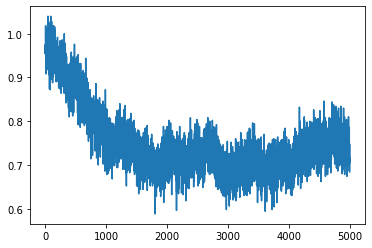

In [40]:
progress_c1001_deltar_ep5000=progress
plt.plot(progress_c1001_deltar_ep5000)

In [49]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.1;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.randint(0, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print(ep,"th iteration L=",lossCal(1,theta))
    progress.append(lossCal(1,theta))
    thdata.append(theta)

0 th iteration L= 0.938
1 th iteration L= 0.86
2 th iteration L= 0.878
3 th iteration L= 0.944
4 th iteration L= 0.868
5 th iteration L= 0.854
6 th iteration L= 0.794
7 th iteration L= 0.858
8 th iteration L= 0.83
9 th iteration L= 0.8140000000000001
10 th iteration L= 0.888
11 th iteration L= 0.792
12 th iteration L= 0.868
13 th iteration L= 0.768
14 th iteration L= 0.796
15 th iteration L= 0.796
16 th iteration L= 0.6799999999999999
17 th iteration L= 0.692
18 th iteration L= 0.712
19 th iteration L= 0.702
20 th iteration L= 0.7
21 th iteration L= 0.6679999999999999
22 th iteration L= 0.692
23 th iteration L= 0.6759999999999999
24 th iteration L= 0.6779999999999999
25 th iteration L= 0.698
26 th iteration L= 0.7
27 th iteration L= 0.656
28 th iteration L= 0.712
29 th iteration L= 0.6659999999999999
30 th iteration L= 0.692
31 th iteration L= 0.644
32 th iteration L= 0.632
33 th iteration L= 0.654
34 th iteration L= 0.6779999999999999
35 th iteration L= 0.6759999999999999
36 th iterat

284 th iteration L= 0.798
285 th iteration L= 0.744
286 th iteration L= 0.8140000000000001
287 th iteration L= 0.76
288 th iteration L= 0.776
289 th iteration L= 0.766
290 th iteration L= 0.768
291 th iteration L= 0.734
292 th iteration L= 0.744
293 th iteration L= 0.748
294 th iteration L= 0.758
295 th iteration L= 0.688
296 th iteration L= 0.792
297 th iteration L= 1.002
298 th iteration L= 1.052
299 th iteration L= 1.014
300 th iteration L= 1.028
301 th iteration L= 1.008
302 th iteration L= 1.074
303 th iteration L= 1.036
304 th iteration L= 0.954
305 th iteration L= 1.062
306 th iteration L= 1.016
307 th iteration L= 1.03
308 th iteration L= 1.016
309 th iteration L= 1.02
310 th iteration L= 1.014
311 th iteration L= 0.942
312 th iteration L= 0.982
313 th iteration L= 0.99
314 th iteration L= 0.974
315 th iteration L= 1.04
316 th iteration L= 1.006
317 th iteration L= 1.008
318 th iteration L= 1.008
319 th iteration L= 1.006
320 th iteration L= 0.928
321 th iteration L= 0.93399999

582 th iteration L= 0.736
583 th iteration L= 0.6679999999999999
584 th iteration L= 0.738
585 th iteration L= 0.762
586 th iteration L= 0.722
587 th iteration L= 0.698
588 th iteration L= 0.704
589 th iteration L= 0.746
590 th iteration L= 0.6739999999999999
591 th iteration L= 0.752
592 th iteration L= 0.746
593 th iteration L= 0.704
594 th iteration L= 0.766
595 th iteration L= 0.754
596 th iteration L= 0.712
597 th iteration L= 0.742
598 th iteration L= 0.6839999999999999
599 th iteration L= 0.718
600 th iteration L= 0.688
601 th iteration L= 0.704
602 th iteration L= 0.75
603 th iteration L= 0.69
604 th iteration L= 0.716
605 th iteration L= 0.76
606 th iteration L= 0.74
607 th iteration L= 0.726
608 th iteration L= 0.714
609 th iteration L= 0.696
610 th iteration L= 0.718
611 th iteration L= 0.704
612 th iteration L= 0.6799999999999999
613 th iteration L= 0.778
614 th iteration L= 0.746
615 th iteration L= 0.726
616 th iteration L= 0.722
617 th iteration L= 0.756
618 th iteration

875 th iteration L= 0.636
876 th iteration L= 0.732
877 th iteration L= 0.69
878 th iteration L= 0.78
879 th iteration L= 0.6839999999999999
880 th iteration L= 0.6699999999999999
881 th iteration L= 0.6819999999999999
882 th iteration L= 0.73
883 th iteration L= 0.73
884 th iteration L= 0.71
885 th iteration L= 0.74
886 th iteration L= 0.6859999999999999
887 th iteration L= 0.636
888 th iteration L= 0.704
889 th iteration L= 0.74
890 th iteration L= 0.69
891 th iteration L= 0.738
892 th iteration L= 0.696
893 th iteration L= 0.718
894 th iteration L= 0.6839999999999999
895 th iteration L= 0.694
896 th iteration L= 0.694
897 th iteration L= 0.698
898 th iteration L= 0.69
899 th iteration L= 0.734
900 th iteration L= 0.648
901 th iteration L= 0.702
902 th iteration L= 0.6579999999999999
903 th iteration L= 0.696
904 th iteration L= 0.6679999999999999
905 th iteration L= 0.702
906 th iteration L= 0.742
907 th iteration L= 0.7
908 th iteration L= 0.742
909 th iteration L= 0.71
910 th iter

1159 th iteration L= 0.72
1160 th iteration L= 0.688
1161 th iteration L= 0.74
1162 th iteration L= 0.7
1163 th iteration L= 0.6759999999999999
1164 th iteration L= 0.692
1165 th iteration L= 0.702
1166 th iteration L= 0.728
1167 th iteration L= 0.702
1168 th iteration L= 0.738
1169 th iteration L= 0.758
1170 th iteration L= 0.688
1171 th iteration L= 0.694
1172 th iteration L= 0.6679999999999999
1173 th iteration L= 0.72
1174 th iteration L= 0.6759999999999999
1175 th iteration L= 0.706
1176 th iteration L= 0.6859999999999999
1177 th iteration L= 0.6759999999999999
1178 th iteration L= 0.6859999999999999
1179 th iteration L= 0.704
1180 th iteration L= 0.6699999999999999
1181 th iteration L= 0.698
1182 th iteration L= 0.73
1183 th iteration L= 0.784
1184 th iteration L= 0.6799999999999999
1185 th iteration L= 0.6759999999999999
1186 th iteration L= 0.718
1187 th iteration L= 0.708
1188 th iteration L= 0.726
1189 th iteration L= 0.72
1190 th iteration L= 0.748
1191 th iteration L= 0.654

1454 th iteration L= 0.786
1455 th iteration L= 0.746
1456 th iteration L= 0.746
1457 th iteration L= 0.748
1458 th iteration L= 0.6859999999999999
1459 th iteration L= 0.766
1460 th iteration L= 0.716
1461 th iteration L= 0.766
1462 th iteration L= 0.732
1463 th iteration L= 0.712
1464 th iteration L= 0.758
1465 th iteration L= 0.704
1466 th iteration L= 0.72
1467 th iteration L= 0.6699999999999999
1468 th iteration L= 0.784
1469 th iteration L= 0.726
1470 th iteration L= 0.752
1471 th iteration L= 0.716
1472 th iteration L= 0.6659999999999999
1473 th iteration L= 0.76
1474 th iteration L= 0.742
1475 th iteration L= 0.692
1476 th iteration L= 0.7
1477 th iteration L= 0.738
1478 th iteration L= 0.696
1479 th iteration L= 0.744
1480 th iteration L= 0.718
1481 th iteration L= 0.714
1482 th iteration L= 0.6659999999999999
1483 th iteration L= 0.6839999999999999
1484 th iteration L= 0.6699999999999999
1485 th iteration L= 0.786
1486 th iteration L= 0.764
1487 th iteration L= 0.76
1488 th i

1750 th iteration L= 1.012
1751 th iteration L= 1.026
1752 th iteration L= 1.07
1753 th iteration L= 0.994
1754 th iteration L= 0.986
1755 th iteration L= 1.002
1756 th iteration L= 0.95
1757 th iteration L= 1.03
1758 th iteration L= 0.9
1759 th iteration L= 0.958
1760 th iteration L= 0.9339999999999999
1761 th iteration L= 0.954
1762 th iteration L= 1.012
1763 th iteration L= 0.952
1764 th iteration L= 0.95
1765 th iteration L= 0.972
1766 th iteration L= 0.978
1767 th iteration L= 0.89
1768 th iteration L= 1.0
1769 th iteration L= 0.99
1770 th iteration L= 0.96
1771 th iteration L= 0.952
1772 th iteration L= 0.89
1773 th iteration L= 0.87
1774 th iteration L= 0.904
1775 th iteration L= 0.958
1776 th iteration L= 0.982
1777 th iteration L= 0.9299999999999999
1778 th iteration L= 0.914
1779 th iteration L= 0.852
1780 th iteration L= 0.86
1781 th iteration L= 0.856
1782 th iteration L= 0.912
1783 th iteration L= 0.876
1784 th iteration L= 0.878
1785 th iteration L= 0.9
1786 th iteration 

2034 th iteration L= 0.638
2035 th iteration L= 0.716
2036 th iteration L= 0.656
2037 th iteration L= 0.6859999999999999
2038 th iteration L= 0.692
2039 th iteration L= 0.6619999999999999
2040 th iteration L= 0.706
2041 th iteration L= 0.6699999999999999
2042 th iteration L= 0.6739999999999999
2043 th iteration L= 0.6599999999999999
2044 th iteration L= 0.632
2045 th iteration L= 0.6719999999999999
2046 th iteration L= 0.64
2047 th iteration L= 0.652
2048 th iteration L= 0.6579999999999999
2049 th iteration L= 0.5920000000000001
2050 th iteration L= 0.6619999999999999
2051 th iteration L= 0.6779999999999999
2052 th iteration L= 0.6839999999999999
2053 th iteration L= 0.72
2054 th iteration L= 0.632
2055 th iteration L= 0.652
2056 th iteration L= 0.6839999999999999
2057 th iteration L= 0.644
2058 th iteration L= 0.714
2059 th iteration L= 0.722
2060 th iteration L= 0.654
2061 th iteration L= 0.632
2062 th iteration L= 0.728
2063 th iteration L= 0.6719999999999999
2064 th iteration L= 0.

2306 th iteration L= 0.712
2307 th iteration L= 0.708
2308 th iteration L= 0.696
2309 th iteration L= 0.69
2310 th iteration L= 0.694
2311 th iteration L= 0.706
2312 th iteration L= 0.628
2313 th iteration L= 0.6699999999999999
2314 th iteration L= 0.706
2315 th iteration L= 0.652
2316 th iteration L= 0.63
2317 th iteration L= 0.6639999999999999
2318 th iteration L= 0.602
2319 th iteration L= 0.7
2320 th iteration L= 0.694
2321 th iteration L= 0.712
2322 th iteration L= 0.726
2323 th iteration L= 0.688
2324 th iteration L= 0.6599999999999999
2325 th iteration L= 0.6599999999999999
2326 th iteration L= 0.638
2327 th iteration L= 0.6619999999999999
2328 th iteration L= 0.72
2329 th iteration L= 0.6659999999999999
2330 th iteration L= 0.726
2331 th iteration L= 1.038
2332 th iteration L= 1.004
2333 th iteration L= 1.018
2334 th iteration L= 0.974
2335 th iteration L= 0.98
2336 th iteration L= 1.05
2337 th iteration L= 0.974
2338 th iteration L= 0.974
2339 th iteration L= 1.004
2340 th ite

2590 th iteration L= 0.692
2591 th iteration L= 0.736
2592 th iteration L= 0.75
2593 th iteration L= 0.722
2594 th iteration L= 0.73
2595 th iteration L= 0.6739999999999999
2596 th iteration L= 0.698
2597 th iteration L= 0.738
2598 th iteration L= 0.708
2599 th iteration L= 0.6759999999999999
2600 th iteration L= 0.6819999999999999
2601 th iteration L= 0.63
2602 th iteration L= 0.772
2603 th iteration L= 0.722
2604 th iteration L= 0.716
2605 th iteration L= 0.758
2606 th iteration L= 0.744
2607 th iteration L= 0.706
2608 th iteration L= 0.71
2609 th iteration L= 0.728
2610 th iteration L= 0.6759999999999999
2611 th iteration L= 0.7
2612 th iteration L= 0.72
2613 th iteration L= 0.742
2614 th iteration L= 0.716
2615 th iteration L= 0.716
2616 th iteration L= 0.722
2617 th iteration L= 0.744
2618 th iteration L= 0.702
2619 th iteration L= 0.656
2620 th iteration L= 0.694
2621 th iteration L= 0.722
2622 th iteration L= 0.73
2623 th iteration L= 0.746
2624 th iteration L= 0.738
2625 th ite

2883 th iteration L= 0.73
2884 th iteration L= 0.706
2885 th iteration L= 0.766
2886 th iteration L= 0.736
2887 th iteration L= 0.696
2888 th iteration L= 0.722
2889 th iteration L= 0.766
2890 th iteration L= 0.72
2891 th iteration L= 0.752
2892 th iteration L= 0.712
2893 th iteration L= 0.706
2894 th iteration L= 0.768
2895 th iteration L= 0.716
2896 th iteration L= 0.724
2897 th iteration L= 0.732
2898 th iteration L= 0.782
2899 th iteration L= 0.714
2900 th iteration L= 0.6859999999999999
2901 th iteration L= 0.734
2902 th iteration L= 0.766
2903 th iteration L= 0.712
2904 th iteration L= 0.772
2905 th iteration L= 0.6619999999999999
2906 th iteration L= 0.734
2907 th iteration L= 0.786
2908 th iteration L= 0.6859999999999999
2909 th iteration L= 0.688
2910 th iteration L= 1.194
2911 th iteration L= 1.2
2912 th iteration L= 1.174
2913 th iteration L= 1.18
2914 th iteration L= 1.166
2915 th iteration L= 1.19
2916 th iteration L= 1.154
2917 th iteration L= 1.148
2918 th iteration L= 1

3177 th iteration L= 0.698
3178 th iteration L= 0.752
3179 th iteration L= 0.706
3180 th iteration L= 0.708
3181 th iteration L= 0.654
3182 th iteration L= 0.754
3183 th iteration L= 0.712
3184 th iteration L= 0.71
3185 th iteration L= 0.6839999999999999
3186 th iteration L= 0.694
3187 th iteration L= 0.69
3188 th iteration L= 0.6659999999999999
3189 th iteration L= 0.758
3190 th iteration L= 0.6859999999999999
3191 th iteration L= 0.6839999999999999
3192 th iteration L= 0.6679999999999999
3193 th iteration L= 0.708
3194 th iteration L= 0.71
3195 th iteration L= 0.646
3196 th iteration L= 0.6759999999999999
3197 th iteration L= 0.7
3198 th iteration L= 0.626
3199 th iteration L= 0.652
3200 th iteration L= 0.694
3201 th iteration L= 0.736
3202 th iteration L= 0.6799999999999999
3203 th iteration L= 0.688
3204 th iteration L= 0.722
3205 th iteration L= 0.6579999999999999
3206 th iteration L= 0.74
3207 th iteration L= 0.6839999999999999
3208 th iteration L= 0.704
3209 th iteration L= 0.69

3464 th iteration L= 0.6859999999999999
3465 th iteration L= 0.738
3466 th iteration L= 0.702
3467 th iteration L= 0.654
3468 th iteration L= 0.6599999999999999
3469 th iteration L= 0.712
3470 th iteration L= 0.6779999999999999
3471 th iteration L= 0.688
3472 th iteration L= 0.694
3473 th iteration L= 0.6839999999999999
3474 th iteration L= 0.6659999999999999
3475 th iteration L= 0.7
3476 th iteration L= 0.732
3477 th iteration L= 0.698
3478 th iteration L= 0.6679999999999999
3479 th iteration L= 0.6779999999999999
3480 th iteration L= 0.6639999999999999
3481 th iteration L= 0.6819999999999999
3482 th iteration L= 0.702
3483 th iteration L= 0.706
3484 th iteration L= 0.69
3485 th iteration L= 0.75
3486 th iteration L= 0.722
3487 th iteration L= 0.644
3488 th iteration L= 0.646
3489 th iteration L= 0.6679999999999999
3490 th iteration L= 0.766
3491 th iteration L= 0.702
3492 th iteration L= 0.648
3493 th iteration L= 0.696
3494 th iteration L= 0.716
3495 th iteration L= 0.66999999999999

3744 th iteration L= 1.008
3745 th iteration L= 1.016
3746 th iteration L= 0.982
3747 th iteration L= 0.996
3748 th iteration L= 0.982
3749 th iteration L= 0.988
3750 th iteration L= 0.976
3751 th iteration L= 0.9319999999999999
3752 th iteration L= 0.988
3753 th iteration L= 0.998
3754 th iteration L= 0.95
3755 th iteration L= 0.926
3756 th iteration L= 0.9339999999999999
3757 th iteration L= 0.9299999999999999
3758 th iteration L= 0.958
3759 th iteration L= 1.02
3760 th iteration L= 0.95
3761 th iteration L= 0.918
3762 th iteration L= 0.95
3763 th iteration L= 0.96
3764 th iteration L= 0.956
3765 th iteration L= 0.9299999999999999
3766 th iteration L= 0.882
3767 th iteration L= 0.876
3768 th iteration L= 0.922
3769 th iteration L= 0.952
3770 th iteration L= 0.848
3771 th iteration L= 0.914
3772 th iteration L= 0.872
3773 th iteration L= 0.886
3774 th iteration L= 0.9339999999999999
3775 th iteration L= 0.852
3776 th iteration L= 0.926
3777 th iteration L= 0.902
3778 th iteration L= 0

4034 th iteration L= 1.218
4035 th iteration L= 1.236
4036 th iteration L= 1.198
4037 th iteration L= 1.144
4038 th iteration L= 1.218
4039 th iteration L= 1.106
4040 th iteration L= 1.206
4041 th iteration L= 1.126
4042 th iteration L= 1.184
4043 th iteration L= 1.078
4044 th iteration L= 1.144
4045 th iteration L= 1.074
4046 th iteration L= 1.06
4047 th iteration L= 1.04
4048 th iteration L= 1.088
4049 th iteration L= 1.112
4050 th iteration L= 1.07
4051 th iteration L= 1.032
4052 th iteration L= 1.054
4053 th iteration L= 1.024
4054 th iteration L= 1.056
4055 th iteration L= 1.058
4056 th iteration L= 1.07
4057 th iteration L= 1.036
4058 th iteration L= 1.004
4059 th iteration L= 1.06
4060 th iteration L= 1.034
4061 th iteration L= 1.044
4062 th iteration L= 1.042
4063 th iteration L= 1.01
4064 th iteration L= 1.018
4065 th iteration L= 0.968
4066 th iteration L= 1.04
4067 th iteration L= 1.002
4068 th iteration L= 0.98
4069 th iteration L= 0.99
4070 th iteration L= 0.988
4071 th it

4319 th iteration L= 1.01
4320 th iteration L= 1.052
4321 th iteration L= 1.032
4322 th iteration L= 0.988
4323 th iteration L= 1.01
4324 th iteration L= 0.938
4325 th iteration L= 1.004
4326 th iteration L= 1.016
4327 th iteration L= 0.942
4328 th iteration L= 0.986
4329 th iteration L= 0.888
4330 th iteration L= 0.882
4331 th iteration L= 0.942
4332 th iteration L= 0.918
4333 th iteration L= 0.914
4334 th iteration L= 0.888
4335 th iteration L= 0.906
4336 th iteration L= 0.902
4337 th iteration L= 0.918
4338 th iteration L= 0.88
4339 th iteration L= 0.838
4340 th iteration L= 0.854
4341 th iteration L= 0.642
4342 th iteration L= 0.708
4343 th iteration L= 0.712
4344 th iteration L= 0.73
4345 th iteration L= 0.696
4346 th iteration L= 0.732
4347 th iteration L= 0.702
4348 th iteration L= 0.6859999999999999
4349 th iteration L= 0.72
4350 th iteration L= 0.76
4351 th iteration L= 0.718
4352 th iteration L= 0.708
4353 th iteration L= 0.696
4354 th iteration L= 0.72
4355 th iteration L= 0

4605 th iteration L= 0.84
4606 th iteration L= 0.844
4607 th iteration L= 0.832
4608 th iteration L= 0.836
4609 th iteration L= 0.864
4610 th iteration L= 0.784
4611 th iteration L= 0.862
4612 th iteration L= 0.794
4613 th iteration L= 0.844
4614 th iteration L= 0.8200000000000001
4615 th iteration L= 0.804
4616 th iteration L= 0.778
4617 th iteration L= 0.878
4618 th iteration L= 0.8180000000000001
4619 th iteration L= 0.774
4620 th iteration L= 0.78
4621 th iteration L= 0.742
4622 th iteration L= 0.764
4623 th iteration L= 0.736
4624 th iteration L= 0.778
4625 th iteration L= 0.746
4626 th iteration L= 0.8180000000000001
4627 th iteration L= 0.796
4628 th iteration L= 0.766
4629 th iteration L= 0.714
4630 th iteration L= 0.712
4631 th iteration L= 0.792
4632 th iteration L= 0.772
4633 th iteration L= 0.786
4634 th iteration L= 0.736
4635 th iteration L= 0.722
4636 th iteration L= 0.752
4637 th iteration L= 0.776
4638 th iteration L= 0.772
4639 th iteration L= 0.766
4640 th iteration 

KeyboardInterrupt: 

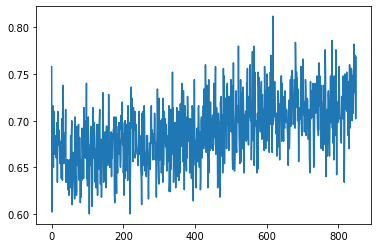

In [50]:
progress_c101_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [58]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.5;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=0.5*random.randint(1, 6)+random.random()
    theta=theta+SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.06 th= [1.585 0.794 4.901 5.784 5.585 1.356 1.985 3.315]  iter= 0
L= 1.05 th= [1.595 0.804 4.803 5.794 5.59  1.374 1.976 3.306]  iter= 1
L= 1.02 th= [1.597 0.812 4.72  5.797 5.591 1.375 1.997 3.303]  iter= 2
L= 0.9 th= [1.578 0.813 4.611 5.812 5.58  1.395 1.996 3.311]  iter= 3
L= 0.92 th= [1.596 0.79  4.519 5.849 5.579 1.389 2.003 3.317]  iter= 4
L= 0.91 th= [1.622 0.756 4.274 5.925 5.526 1.345 2.018 3.299]  iter= 5
L= 0.79 th= [1.621 0.749 4.21  5.937 5.517 1.355 2.001 3.306]  iter= 6
L= 0.83 th= [1.638 0.77  4.119 5.929 5.523 1.363 2.007 3.267]  iter= 7
L= 0.75 th= [1.618 0.79  4.034 5.934 5.514 1.392 2.027 3.29 ]  iter= 8
L= 0.75 th= [1.605 0.8   3.96  5.918 5.542 1.391 2.035 3.304]  iter= 9
L= 0.74 th= [1.596 0.794 3.943 5.917 5.548 1.402 2.026 3.298]  iter= 10
L= 0.81 th= [1.597 0.799 3.914 5.913 5.544 1.4   2.032 3.292]  iter= 11
L= 0.8 th= [1.597 0.79  3.901 5.909 5.545 1.393 2.03  3.3  ]  iter= 12
L= 0.75 th= [1.582 0.801 3.873 5.912 5.516 1.389 2.003 3.273]  iter= 13
L= 0

L= 0.72 th= [1.257 0.829 3.641 5.946 5.628 1.524 1.967 3.116]  iter= 115
L= 0.65 th= [1.248 0.832 3.638 5.948 5.636 1.523 1.955 3.119]  iter= 116
L= 0.73 th= [1.245 0.833 3.626 5.949 5.643 1.53  1.96  3.123]  iter= 117
L= 0.74 th= [1.246 0.838 3.62  5.951 5.641 1.526 1.967 3.131]  iter= 118
L= 0.73 th= [1.247 0.837 3.628 5.94  5.66  1.446 1.945 3.12 ]  iter= 119
L= 0.73 th= [1.24  0.842 3.631 5.961 5.666 1.436 1.951 3.131]  iter= 120
L= 0.7 th= [1.245 0.836 3.687 5.968 5.65  1.443 1.96  3.134]  iter= 121
L= 0.69 th= [1.251 0.838 3.705 5.979 5.643 1.452 1.962 3.14 ]  iter= 122
L= 0.74 th= [1.259 0.823 3.707 5.976 5.631 1.449 1.96  3.139]  iter= 123
L= 0.74 th= [1.248 0.834 3.705 5.97  5.653 1.455 1.961 3.145]  iter= 124
L= 0.72 th= [1.248 0.829 3.699 5.977 5.658 1.447 1.963 3.148]  iter= 125
L= 0.71 th= [1.239 0.855 3.687 5.953 5.669 1.467 1.986 3.143]  iter= 126
L= 0.67 th= [1.237 0.855 3.684 5.952 5.66  1.461 1.998 3.128]  iter= 127
L= 0.71 th= [1.236 0.866 3.684 5.957 5.686 1.479 1.9

L= 0.7 th= [1.2   1.037 3.638 5.943 5.772 1.564 2.135 3.124]  iter= 229
L= 0.75 th= [1.215 1.031 3.621 5.93  5.807 1.554 2.146 3.101]  iter= 230
L= 0.69 th= [1.219 1.037 3.616 5.933 5.812 1.568 2.15  3.084]  iter= 231
L= 0.69 th= [1.21  1.045 3.605 5.935 5.816 1.559 2.136 3.089]  iter= 232
L= 0.72 th= [1.215 1.044 3.605 5.942 5.81  1.538 2.128 3.105]  iter= 233
L= 0.71 th= [1.239 1.05  3.61  5.918 5.776 1.548 2.111 3.055]  iter= 234
L= 0.69 th= [1.246 1.054 3.601 5.938 5.763 1.531 2.112 3.074]  iter= 235
L= 0.71 th= [1.266 1.047 3.612 5.94  5.756 1.541 2.116 3.07 ]  iter= 236
L= 0.72 th= [1.267 1.04  3.581 5.936 5.759 1.537 2.1   3.039]  iter= 237
L= 0.69 th= [1.266 1.034 3.591 5.95  5.773 1.553 2.109 3.05 ]  iter= 238
L= 0.69 th= [1.243 1.031 3.584 5.946 5.773 1.535 2.113 3.068]  iter= 239
L= 0.69 th= [1.256 1.018 3.58  5.954 5.724 1.522 2.127 3.082]  iter= 240
L= 0.72 th= [1.256 1.033 3.587 5.953 5.731 1.518 2.127 3.081]  iter= 241
L= 0.69 th= [1.255 1.041 3.589 5.941 5.736 1.526 2.1

L= 0.76 th= [1.331 1.021 3.623 5.939 5.7   1.381 2.312 3.338]  iter= 343
L= 0.66 th= [1.332 1.026 3.624 5.944 5.693 1.381 2.327 3.34 ]  iter= 344
L= 0.69 th= [1.32  1.026 3.619 5.942 5.69  1.383 2.335 3.337]  iter= 345
L= 0.69 th= [1.336 1.004 3.563 5.983 5.673 1.365 2.36  3.325]  iter= 346
L= 0.7 th= [1.352 1.026 3.557 5.982 5.661 1.365 2.371 3.314]  iter= 347
L= 0.7 th= [1.32  1.046 3.616 5.992 5.633 1.377 2.38  3.356]  iter= 348
L= 0.72 th= [1.336 1.069 3.627 6.005 5.616 1.377 2.38  3.356]  iter= 349
L= 0.71 th= [1.333 1.094 3.622 5.995 5.617 1.362 2.379 3.356]  iter= 350
L= 0.72 th= [1.336 1.111 3.608 6.006 5.626 1.376 2.371 3.357]  iter= 351
L= 0.75 th= [1.333 1.12  3.608 5.999 5.633 1.393 2.386 3.356]  iter= 352
L= 0.71 th= [1.341 1.13  3.616 5.995 5.642 1.374 2.368 3.349]  iter= 353
L= 0.68 th= [1.336 1.128 3.625 6.001 5.642 1.367 2.372 3.355]  iter= 354
L= 0.78 th= [1.332 1.134 3.638 6.023 5.648 1.373 2.385 3.34 ]  iter= 355
L= 0.7 th= [1.353 1.125 3.648 5.996 5.632 1.366 2.387

L= 0.63 th= [1.347 0.895 3.601 6.018 5.532 1.367 2.502 3.209]  iter= 456
L= 0.69 th= [1.34  0.879 3.582 6.018 5.505 1.346 2.493 3.217]  iter= 457
L= 0.66 th= [1.329 0.887 3.577 6.016 5.547 1.296 2.531 3.217]  iter= 458
L= 0.71 th= [1.324 0.873 3.562 6.078 5.555 1.278 2.554 3.207]  iter= 459
L= 0.67 th= [1.331 0.872 3.571 6.071 5.548 1.287 2.569 3.206]  iter= 460
L= 0.72 th= [1.341 0.886 3.561 6.045 5.563 1.282 2.561 3.186]  iter= 461
L= 0.66 th= [1.352 0.897 3.566 6.035 5.561 1.292 2.542 3.194]  iter= 462
L= 0.7 th= [1.336 0.909 3.577 6.031 5.553 1.294 2.537 3.186]  iter= 463
L= 0.73 th= [1.355 0.933 3.574 6.036 5.566 1.296 2.517 3.191]  iter= 464
L= 0.68 th= [1.359 0.929 3.585 6.043 5.563 1.301 2.519 3.189]  iter= 465
L= 0.69 th= [1.376 0.924 3.59  6.02  5.552 1.307 2.514 3.185]  iter= 466
L= 0.73 th= [1.379 0.918 3.602 5.967 5.53  1.297 2.518 3.206]  iter= 467
L= 0.74 th= [1.367 0.92  3.591 5.968 5.547 1.297 2.523 3.201]  iter= 468
L= 0.57 th= [1.371 0.923 3.597 5.974 5.54  1.313 2.5

L= 0.68 th= [1.291 1.019 3.59  5.976 5.411 1.222 2.55  3.548]  iter= 570
L= 0.71 th= [1.296 1.018 3.59  5.983 5.403 1.212 2.556 3.554]  iter= 571
L= 0.67 th= [1.326 1.025 3.608 5.973 5.405 1.227 2.538 3.55 ]  iter= 572
L= 0.7 th= [1.319 1.018 3.613 5.971 5.406 1.224 2.544 3.542]  iter= 573
L= 0.75 th= [1.317 1.02  3.623 5.97  5.403 1.229 2.552 3.542]  iter= 574
L= 0.69 th= [1.317 1.023 3.629 5.969 5.374 1.224 2.562 3.533]  iter= 575
L= 0.7 th= [1.317 1.016 3.638 5.955 5.377 1.227 2.573 3.518]  iter= 576
L= 0.69 th= [1.32  1.025 3.627 5.957 5.385 1.223 2.563 3.525]  iter= 577
L= 0.72 th= [1.328 1.066 3.652 5.962 5.391 1.175 2.556 3.51 ]  iter= 578
L= 0.67 th= [1.287 1.076 3.641 5.95  5.387 1.176 2.612 3.518]  iter= 579
L= 0.7 th= [1.297 1.06  3.65  5.95  5.385 1.182 2.611 3.527]  iter= 580
L= 0.69 th= [1.283 1.056 3.649 5.892 5.401 1.197 2.618 3.538]  iter= 581
L= 0.65 th= [1.284 1.046 3.632 5.9   5.383 1.206 2.635 3.527]  iter= 582
L= 0.68 th= [1.298 1.034 3.645 5.905 5.388 1.207 2.638

L= 0.71 th= [1.283 0.986 3.605 5.968 5.406 1.078 2.569 3.577]  iter= 684
L= 0.75 th= [1.267 0.987 3.59  5.947 5.375 1.079 2.556 3.578]  iter= 685
L= 0.7 th= [1.272 0.991 3.606 5.966 5.377 1.093 2.553 3.59 ]  iter= 686
L= 0.75 th= [1.276 1.002 3.617 5.971 5.38  1.1   2.551 3.589]  iter= 687
L= 0.71 th= [1.281 1.002 3.598 5.977 5.377 1.103 2.542 3.592]  iter= 688
L= 0.68 th= [1.297 1.018 3.616 5.99  5.378 1.091 2.531 3.58 ]  iter= 689
L= 0.69 th= [1.302 1.008 3.595 5.965 5.357 1.075 2.518 3.576]  iter= 690
L= 0.7 th= [1.296 1.022 3.594 5.948 5.361 1.073 2.514 3.569]  iter= 691
L= 0.72 th= [1.303 1.027 3.593 5.95  5.375 1.093 2.507 3.559]  iter= 692
L= 0.69 th= [1.307 1.008 3.599 5.942 5.389 1.086 2.519 3.563]  iter= 693
L= 0.75 th= [1.314 1.004 3.606 5.946 5.378 1.08  2.523 3.565]  iter= 694
L= 0.66 th= [1.311 0.997 3.608 5.954 5.383 1.081 2.528 3.557]  iter= 695
L= 0.69 th= [1.33  0.967 3.632 5.963 5.388 1.081 2.53  3.526]  iter= 696
L= 0.73 th= [1.311 0.895 3.6   5.951 5.414 1.055 2.59

L= 0.67 th= [1.333 0.752 3.65  5.95  5.503 0.903 2.552 3.318]  iter= 798
L= 0.67 th= [1.331 0.736 3.636 5.969 5.497 0.899 2.55  3.319]  iter= 799
L= 0.7 th= [1.343 0.723 3.619 5.986 5.503 0.907 2.571 3.312]  iter= 800
L= 0.68 th= [1.341 0.732 3.606 5.983 5.49  0.914 2.585 3.32 ]  iter= 801
L= 0.73 th= [1.35  0.739 3.615 5.987 5.478 0.914 2.576 3.298]  iter= 802
L= 0.67 th= [1.346 0.744 3.608 5.982 5.475 0.922 2.571 3.291]  iter= 803
L= 0.69 th= [1.352 0.719 3.597 5.996 5.482 0.925 2.577 3.271]  iter= 804
L= 0.68 th= [1.355 0.719 3.597 5.988 5.478 0.917 2.57  3.278]  iter= 805
L= 0.73 th= [1.346 0.709 3.606 6.001 5.477 0.934 2.572 3.282]  iter= 806
L= 0.65 th= [1.342 0.71  3.609 6.002 5.475 0.921 2.573 3.279]  iter= 807
L= 0.68 th= [1.354 0.713 3.613 6.012 5.474 0.919 2.561 3.263]  iter= 808
L= 0.75 th= [1.356 0.72  3.632 5.996 5.506 0.913 2.567 3.269]  iter= 809
L= 0.66 th= [1.348 0.71  3.614 6.018 5.522 0.903 2.563 3.312]  iter= 810
L= 0.74 th= [1.348 0.729 3.675 6.012 5.53  0.92  2.5

L= 0.72 th= [1.318 0.792 3.634 5.933 5.372 0.866 2.6   3.446]  iter= 911
L= 0.71 th= [1.294 0.782 3.679 5.934 5.383 0.843 2.603 3.422]  iter= 912
L= 0.73 th= [1.296 0.783 3.681 5.924 5.383 0.844 2.6   3.422]  iter= 913
L= 0.74 th= [1.3   0.771 3.67  5.908 5.385 0.836 2.611 3.429]  iter= 914
L= 0.76 th= [1.313 0.756 3.672 5.91  5.378 0.834 2.613 3.437]  iter= 915
L= 0.73 th= [1.302 0.758 3.659 5.913 5.379 0.845 2.601 3.444]  iter= 916
L= 0.72 th= [1.29  0.754 3.659 5.906 5.376 0.849 2.603 3.433]  iter= 917
L= 0.72 th= [1.296 0.745 3.657 5.91  5.356 0.861 2.588 3.457]  iter= 918
L= 0.71 th= [1.293 0.731 3.653 5.929 5.357 0.864 2.59  3.469]  iter= 919
L= 0.7 th= [1.309 0.733 3.624 5.927 5.341 0.877 2.569 3.455]  iter= 920
L= 0.7 th= [1.327 0.727 3.616 5.939 5.329 0.875 2.559 3.466]  iter= 921
L= 0.68 th= [1.335 0.729 3.627 5.934 5.336 0.868 2.546 3.456]  iter= 922
L= 0.7 th= [1.326 0.727 3.638 5.943 5.329 0.863 2.549 3.449]  iter= 923
L= 0.71 th= [1.327 0.732 3.636 5.938 5.315 0.865 2.542

L= 0.7 th= [1.205 0.778 3.673 5.981 5.354 0.822 2.612 3.308]  iter= 1025
L= 0.7 th= [1.181 0.764 3.672 6.006 5.346 0.794 2.681 3.279]  iter= 1026
L= 0.71 th= [1.16  0.784 3.643 6.02  5.339 0.778 2.685 3.266]  iter= 1027
L= 0.69 th= [1.17  0.756 3.639 5.984 5.345 0.811 2.717 3.292]  iter= 1028
L= 0.73 th= [1.178 0.757 3.651 5.993 5.367 0.797 2.719 3.299]  iter= 1029
L= 0.7 th= [1.188 0.757 3.638 5.971 5.345 0.806 2.725 3.294]  iter= 1030
L= 0.71 th= [1.187 0.752 3.637 5.971 5.335 0.806 2.723 3.293]  iter= 1031
L= 0.7 th= [1.19  0.746 3.632 5.974 5.338 0.823 2.723 3.283]  iter= 1032
L= 0.71 th= [1.231 0.766 3.623 5.98  5.332 0.843 2.749 3.282]  iter= 1033
L= 0.76 th= [1.234 0.756 3.621 5.976 5.323 0.848 2.749 3.277]  iter= 1034
L= 0.73 th= [1.229 0.737 3.624 5.996 5.328 0.84  2.739 3.279]  iter= 1035
L= 0.68 th= [1.227 0.749 3.631 5.995 5.342 0.835 2.761 3.285]  iter= 1036
L= 0.73 th= [1.216 0.754 3.619 5.98  5.344 0.831 2.757 3.283]  iter= 1037
L= 0.72 th= [1.21  0.751 3.615 5.986 5.35 

L= 0.73 th= [1.079 0.813 3.671 5.973 5.293 0.804 2.752 3.386]  iter= 1136
L= 0.72 th= [1.092 0.814 3.675 5.975 5.296 0.811 2.749 3.403]  iter= 1137
L= 0.73 th= [1.075 0.833 3.667 5.993 5.28  0.827 2.738 3.407]  iter= 1138
L= 0.72 th= [1.094 0.806 3.65  5.997 5.298 0.827 2.752 3.421]  iter= 1139
L= 0.74 th= [1.094 0.797 3.655 5.999 5.31  0.838 2.768 3.434]  iter= 1140
L= 0.71 th= [1.075 0.803 3.66  5.985 5.324 0.818 2.764 3.429]  iter= 1141
L= 0.71 th= [1.083 0.796 3.645 5.984 5.307 0.821 2.763 3.414]  iter= 1142
L= 0.71 th= [1.081 0.874 3.626 5.979 5.307 0.798 2.727 3.528]  iter= 1143
L= 0.64 th= [1.075 0.865 3.565 6.014 5.276 0.791 2.702 3.511]  iter= 1144
L= 0.67 th= [1.047 0.879 3.573 6.052 5.291 0.819 2.668 3.537]  iter= 1145
L= 0.62 th= [1.043 0.891 3.556 6.028 5.286 0.805 2.69  3.545]  iter= 1146
L= 0.71 th= [1.045 0.903 3.541 6.018 5.278 0.811 2.688 3.554]  iter= 1147
L= 0.7 th= [1.052 0.914 3.522 6.014 5.28  0.81  2.704 3.56 ]  iter= 1148
L= 0.73 th= [1.065 0.908 3.536 5.988 5.

L= 0.7 th= [1.075 0.811 3.631 5.962 5.18  0.877 2.577 3.624]  iter= 1247
L= 0.7 th= [1.073 0.807 3.636 5.952 5.186 0.883 2.576 3.617]  iter= 1248
L= 0.73 th= [1.086 0.769 3.658 5.977 5.187 0.91  2.549 3.586]  iter= 1249
L= 0.75 th= [1.093 0.782 3.644 5.983 5.2   0.905 2.525 3.578]  iter= 1250
L= 0.7 th= [1.094 0.774 3.638 5.995 5.201 0.899 2.528 3.582]  iter= 1251
L= 0.73 th= [1.1   0.775 3.635 5.994 5.199 0.903 2.523 3.578]  iter= 1252
L= 0.72 th= [1.101 0.789 3.637 5.98  5.212 0.903 2.516 3.584]  iter= 1253
L= 0.69 th= [1.105 0.784 3.638 5.978 5.209 0.898 2.518 3.596]  iter= 1254
L= 0.69 th= [1.103 0.776 3.636 5.973 5.204 0.899 2.51  3.601]  iter= 1255
L= 0.64 th= [1.105 0.754 3.635 5.977 5.212 0.895 2.51  3.587]  iter= 1256
L= 0.69 th= [1.111 0.77  3.647 5.979 5.199 0.901 2.51  3.581]  iter= 1257
L= 0.65 th= [1.092 0.763 3.663 5.99  5.196 0.908 2.51  3.594]  iter= 1258
L= 0.73 th= [1.092 0.765 3.664 5.981 5.204 0.905 2.501 3.603]  iter= 1259
L= 0.69 th= [1.085 0.771 3.65  5.978 5.21

L= 0.72 th= [1.241 0.758 3.643 5.95  5.366 0.646 2.511 3.574]  iter= 1359
L= 0.7 th= [1.244 0.772 3.638 5.95  5.369 0.645 2.511 3.572]  iter= 1360
L= 0.7 th= [1.252 0.774 3.631 5.955 5.373 0.633 2.518 3.576]  iter= 1361
L= 0.68 th= [1.253 0.775 3.629 5.961 5.388 0.642 2.516 3.565]  iter= 1362
L= 0.69 th= [1.244 0.774 3.633 5.954 5.389 0.639 2.513 3.561]  iter= 1363
L= 0.74 th= [1.242 0.769 3.631 5.959 5.388 0.639 2.506 3.566]  iter= 1364
L= 0.72 th= [1.229 0.767 3.633 5.945 5.389 0.636 2.496 3.579]  iter= 1365
L= 0.71 th= [1.226 0.77  3.641 5.947 5.389 0.635 2.495 3.572]  iter= 1366
L= 0.72 th= [1.219 0.757 3.652 5.939 5.395 0.652 2.51  3.596]  iter= 1367
L= 0.67 th= [1.215 0.753 3.641 5.925 5.391 0.641 2.51  3.603]  iter= 1368
L= 0.73 th= [1.216 0.757 3.635 5.923 5.405 0.637 2.514 3.616]  iter= 1369
L= 0.74 th= [1.222 0.769 3.632 5.926 5.402 0.641 2.518 3.615]  iter= 1370
L= 0.72 th= [1.214 0.782 3.63  5.932 5.437 0.654 2.53  3.617]  iter= 1371
L= 0.69 th= [1.214 0.778 3.631 5.921 5.4

L= 0.77 th= [1.468 0.911 3.647 5.972 5.427 0.339 2.795 3.491]  iter= 1471
L= 0.72 th= [1.478 0.886 3.623 5.961 5.432 0.346 2.8   3.476]  iter= 1472
L= 0.74 th= [1.502 0.906 3.616 5.963 5.414 0.362 2.807 3.438]  iter= 1473
L= 0.72 th= [1.497 0.909 3.62  5.956 5.387 0.368 2.809 3.44 ]  iter= 1474
L= 0.72 th= [1.491 0.929 3.605 5.938 5.365 0.376 2.829 3.44 ]  iter= 1475
L= 0.72 th= [1.501 0.934 3.602 5.918 5.381 0.355 2.828 3.433]  iter= 1476
L= 0.71 th= [1.486 0.928 3.607 5.909 5.381 0.345 2.825 3.436]  iter= 1477
L= 0.76 th= [1.479 0.932 3.6   5.93  5.393 0.347 2.83  3.434]  iter= 1478
L= 0.69 th= [1.456 0.932 3.617 5.928 5.391 0.336 2.833 3.417]  iter= 1479
L= 0.71 th= [1.469 0.932 3.616 5.9   5.379 0.338 2.836 3.401]  iter= 1480
L= 0.71 th= [1.463 0.938 3.608 5.904 5.359 0.345 2.836 3.397]  iter= 1481
L= 0.67 th= [1.497 0.889 3.636 5.946 5.355 0.338 2.782 3.404]  iter= 1482
L= 0.67 th= [1.487 0.876 3.62  5.934 5.365 0.336 2.774 3.389]  iter= 1483
L= 0.7 th= [1.488 0.873 3.618 5.926 5.

L= 0.72 th= [1.645 0.854 3.63  5.946 5.276 0.337 2.816 3.131]  iter= 1582
L= 0.73 th= [1.645 0.853 3.623 5.955 5.273 0.339 2.823 3.133]  iter= 1583
L= 0.71 th= [1.642 0.852 3.622 5.954 5.269 0.345 2.825 3.137]  iter= 1584
L= 0.72 th= [1.638 0.87  3.672 6.012 5.282 0.401 2.802 3.179]  iter= 1585
L= 0.74 th= [1.63  0.878 3.669 6.001 5.305 0.401 2.804 3.169]  iter= 1586
L= 0.71 th= [1.653 0.883 3.651 5.983 5.314 0.391 2.81  3.17 ]  iter= 1587
L= 0.73 th= [1.644 0.879 3.645 5.983 5.308 0.384 2.824 3.165]  iter= 1588
L= 0.77 th= [1.639 0.871 3.647 5.991 5.298 0.397 2.845 3.154]  iter= 1589
L= 0.69 th= [1.633 0.875 3.657 5.993 5.295 0.397 2.848 3.156]  iter= 1590
L= 0.76 th= [1.647 0.87  3.637 5.997 5.279 0.406 2.862 3.164]  iter= 1591
L= 0.71 th= [1.605 0.87  3.636 5.99  5.253 0.398 2.849 3.179]  iter= 1592
L= 0.7 th= [1.574 0.843 3.646 5.986 5.27  0.299 2.887 3.163]  iter= 1593
L= 0.71 th= [1.551 0.871 3.605 5.989 5.246 0.268 2.877 3.181]  iter= 1594
L= 0.68 th= [1.552 0.881 3.589 6.013 5.

L= 0.8 th= [1.646 0.864 3.646 5.918 5.296 0.186 2.742 3.189]  iter= 1694
L= 0.74 th= [1.667 0.842 3.687 5.962 5.282 0.165 2.741 3.16 ]  iter= 1695
L= 0.68 th= [1.677 0.849 3.679 5.957 5.275 0.148 2.749 3.153]  iter= 1696
L= 0.71 th= [1.687 0.844 3.675 5.961 5.28  0.157 2.74  3.147]  iter= 1697
L= 0.68 th= [1.684 0.827 3.658 5.975 5.294 0.157 2.747 3.128]  iter= 1698
L= 0.66 th= [1.676 0.823 3.664 5.982 5.286 0.147 2.73  3.103]  iter= 1699
L= 0.72 th= [1.679 0.83  3.654 5.971 5.299 0.147 2.757 3.114]  iter= 1700
L= 0.72 th= [1.684 0.831 3.657 5.974 5.295 0.134 2.758 3.113]  iter= 1701
L= 0.7 th= [1.683 0.83  3.653 5.989 5.301 0.136 2.752 3.111]  iter= 1702
L= 0.69 th= [1.678 0.82  3.651 6.003 5.285 0.126 2.751 3.102]  iter= 1703
L= 0.69 th= [1.668 0.819 3.64  6.009 5.283 0.145 2.745 3.086]  iter= 1704
L= 0.64 th= [1.669 0.818 3.633 6.015 5.283 0.147 2.748 3.095]  iter= 1705
L= 0.69 th= [1.671 0.819 3.629 6.01  5.291 0.159 2.744 3.107]  iter= 1706
L= 0.71 th= [1.653 0.835 3.652 6.003 5.2

L= 0.74 th= [1.671 0.773 3.649 5.913 5.14  0.165 2.698 3.092]  iter= 1806
L= 0.73 th= [1.673 0.72  3.69  5.932 5.083 0.122 2.647 3.151]  iter= 1807
L= 0.71 th= [1.679 0.712 3.689 5.937 5.074 0.104 2.655 3.163]  iter= 1808
L= 0.73 th= [1.686 0.7   3.648 5.943 5.048 0.106 2.658 3.174]  iter= 1809
L= 0.74 th= [1.662 0.719 3.649 5.9   5.006 0.094 2.648 3.156]  iter= 1810
L= 0.68 th= [1.668 0.733 3.627 5.919 5.    0.102 2.642 3.15 ]  iter= 1811
L= 0.73 th= [1.663 0.723 3.642 5.924 5.004 0.108 2.663 3.159]  iter= 1812
L= 0.71 th= [1.659 0.733 3.636 5.917 5.012 0.12  2.66  3.145]  iter= 1813
L= 0.73 th= [1.649 0.719 3.652 5.898 4.993 0.115 2.673 3.124]  iter= 1814
L= 0.71 th= [1.662 0.733 3.649 5.904 5.016 0.12  2.638 3.136]  iter= 1815
L= 0.75 th= [1.66  0.731 3.648 5.905 5.017 0.124 2.641 3.143]  iter= 1816
L= 0.74 th= [1.662 0.722 3.648 5.913 5.012 0.134 2.646 3.155]  iter= 1817
L= 0.69 th= [1.665 0.724 3.646 5.91  5.011 0.139 2.652 3.154]  iter= 1818
L= 0.74 th= [1.665 0.714 3.646 5.917 4

L= 0.7 th= [1.583 0.689 3.639 5.986 4.873 0.11  2.589 3.152]  iter= 1917
L= 0.7 th= [1.597 0.625 3.581 5.995 4.883 0.131 2.604 3.142]  iter= 1918
L= 0.73 th= [1.589 0.618 3.58  5.991 4.873 0.138 2.591 3.146]  iter= 1919
L= 0.68 th= [1.538 0.52  3.612 5.915 4.916 0.181 2.589 3.174]  iter= 1920
L= 0.73 th= [1.531 0.534 3.612 5.918 4.918 0.173 2.589 3.182]  iter= 1921
L= 0.72 th= [1.538 0.539 3.623 5.929 4.915 0.173 2.595 3.165]  iter= 1922
L= 0.71 th= [1.536 0.541 3.578 5.944 4.9   0.173 2.624 3.157]  iter= 1923
L= 0.73 th= [1.541 0.54  3.582 5.937 4.905 0.166 2.621 3.155]  iter= 1924
L= 0.74 th= [1.547 0.54  3.599 5.944 4.908 0.174 2.619 3.149]  iter= 1925
L= 0.74 th= [1.554 0.542 3.601 5.936 4.912 0.174 2.623 3.144]  iter= 1926
L= 0.71 th= [1.546 0.554 3.584 5.938 4.927 0.181 2.632 3.152]  iter= 1927
L= 0.73 th= [1.551 0.568 3.577 5.94  4.912 0.164 2.632 3.155]  iter= 1928
L= 0.72 th= [1.529 0.558 3.58  5.943 4.92  0.171 2.633 3.165]  iter= 1929
L= 0.7 th= [1.521 0.543 3.607 5.948 4.91

L= 0.7 th= [1.615 0.579 3.651 5.922 5.016 0.3   2.692 3.132]  iter= 2029
L= 0.72 th= [1.625 0.587 3.654 5.927 5.01  0.29  2.686 3.139]  iter= 2030
L= 0.66 th= [1.621 0.6   3.645 5.94  4.999 0.286 2.696 3.156]  iter= 2031
L= 0.73 th= [1.625 0.617 3.658 5.96  5.001 0.292 2.699 3.182]  iter= 2032
L= 0.68 th= [1.65  0.616 3.669 5.988 5.007 0.302 2.692 3.201]  iter= 2033
L= 0.71 th= [1.666 0.617 3.628 5.924 5.01  0.324 2.675 3.211]  iter= 2034
L= 0.7 th= [1.662 0.621 3.632 5.933 5.004 0.336 2.677 3.196]  iter= 2035
L= 0.72 th= [1.67  0.626 3.621 5.938 4.996 0.322 2.673 3.215]  iter= 2036
L= 0.73 th= [1.66  0.63  3.619 5.923 4.977 0.316 2.65  3.21 ]  iter= 2037
L= 0.71 th= [1.662 0.663 3.633 5.952 4.978 0.311 2.647 3.229]  iter= 2038
L= 0.67 th= [1.65  0.665 3.627 5.957 4.984 0.326 2.655 3.23 ]  iter= 2039
L= 0.74 th= [1.652 0.65  3.643 5.981 4.992 0.33  2.647 3.248]  iter= 2040
L= 0.71 th= [1.641 0.653 3.644 5.988 4.984 0.332 2.668 3.237]  iter= 2041
L= 0.74 th= [1.654 0.641 3.623 5.958 4.9

L= 0.7 th= [1.826 0.684 3.629 5.954 4.946 0.368 2.417 3.068]  iter= 2141
L= 0.7 th= [1.831 0.688 3.634 5.954 4.948 0.366 2.421 3.075]  iter= 2142
L= 0.73 th= [1.833 0.688 3.639 5.961 4.959 0.362 2.432 3.087]  iter= 2143
L= 0.74 th= [1.831 0.684 3.64  5.959 4.956 0.353 2.423 3.089]  iter= 2144
L= 0.7 th= [1.823 0.678 3.642 5.959 4.953 0.359 2.424 3.087]  iter= 2145
L= 0.68 th= [1.811 0.683 3.662 5.959 4.961 0.396 2.442 3.126]  iter= 2146
L= 0.72 th= [1.806 0.681 3.661 5.957 4.959 0.399 2.44  3.124]  iter= 2147
L= 0.74 th= [1.813 0.666 3.672 5.954 4.958 0.389 2.442 3.123]  iter= 2148
L= 0.75 th= [1.785 0.675 3.655 5.955 4.954 0.387 2.439 3.124]  iter= 2149
L= 0.75 th= [1.791 0.663 3.658 5.958 4.956 0.397 2.441 3.101]  iter= 2150
L= 0.72 th= [1.782 0.673 3.658 5.954 4.953 0.406 2.454 3.096]  iter= 2151
L= 0.75 th= [1.766 0.685 3.665 5.94  4.95  0.411 2.459 3.11 ]  iter= 2152
L= 0.74 th= [1.758 0.692 3.665 5.924 4.952 0.428 2.467 3.117]  iter= 2153
L= 0.69 th= [1.75  0.703 3.663 5.927 4.95

L= 0.73 th= [1.536 0.606 3.651 5.952 4.992 0.504 2.29  2.856]  iter= 2253
L= 0.71 th= [1.56  0.576 3.647 5.952 5.    0.529 2.282 2.874]  iter= 2254
L= 0.66 th= [1.552 0.603 3.651 5.976 4.994 0.518 2.267 2.875]  iter= 2255
L= 0.67 th= [1.574 0.59  3.634 5.928 4.994 0.486 2.255 2.888]  iter= 2256
L= 0.69 th= [1.581 0.574 3.628 5.926 5.006 0.491 2.263 2.881]  iter= 2257
L= 0.73 th= [1.571 0.568 3.624 5.92  5.011 0.482 2.253 2.875]  iter= 2258
L= 0.71 th= [1.561 0.598 3.64  5.902 5.009 0.487 2.256 2.871]  iter= 2259
L= 0.69 th= [1.572 0.601 3.684 5.898 5.04  0.523 2.25  2.866]  iter= 2260
L= 0.73 th= [1.6   0.585 3.675 5.906 4.998 0.537 2.254 2.878]  iter= 2261
L= 0.76 th= [1.608 0.598 3.67  5.904 5.002 0.526 2.251 2.872]  iter= 2262
L= 0.8 th= [1.604 0.59  3.651 5.905 4.993 0.539 2.25  2.874]  iter= 2263
L= 0.68 th= [1.606 0.589 3.657 5.909 4.993 0.542 2.246 2.884]  iter= 2264
L= 0.73 th= [1.631 0.588 3.659 5.928 4.988 0.537 2.247 2.884]  iter= 2265
L= 0.67 th= [1.625 0.588 3.665 5.928 4.

L= 0.7 th= [1.735 0.756 3.658 5.986 4.957 0.463 2.367 2.782]  iter= 2364
L= 0.75 th= [1.729 0.757 3.651 5.981 4.962 0.454 2.365 2.783]  iter= 2365
L= 0.66 th= [1.718 0.759 3.65  5.975 4.957 0.46  2.365 2.787]  iter= 2366
L= 0.68 th= [1.718 0.773 3.66  5.975 4.939 0.455 2.35  2.783]  iter= 2367
L= 0.7 th= [1.715 0.768 3.662 5.971 4.939 0.46  2.343 2.789]  iter= 2368
L= 0.75 th= [1.704 0.766 3.64  5.974 4.964 0.467 2.358 2.773]  iter= 2369
L= 0.66 th= [1.7   0.773 3.643 5.982 4.966 0.477 2.351 2.763]  iter= 2370
L= 0.75 th= [1.705 0.775 3.637 5.977 4.966 0.48  2.353 2.766]  iter= 2371
L= 0.66 th= [1.703 0.778 3.628 5.984 4.95  0.487 2.358 2.775]  iter= 2372
L= 0.75 th= [1.699 0.784 3.628 5.977 4.949 0.484 2.36  2.793]  iter= 2373
L= 0.67 th= [1.702 0.781 3.629 5.969 4.939 0.486 2.366 2.792]  iter= 2374
L= 0.68 th= [1.705 0.772 3.633 5.967 4.945 0.485 2.362 2.789]  iter= 2375
L= 0.65 th= [1.711 0.772 3.619 5.975 4.947 0.48  2.343 2.794]  iter= 2376
L= 0.73 th= [1.718 0.769 3.633 5.971 4.9

KeyboardInterrupt: 

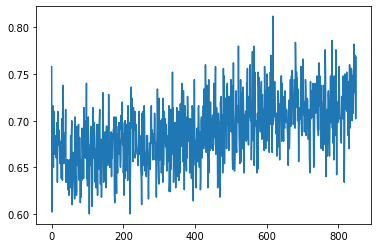

In [59]:
progress_c105_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [ ]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01;   
delta=6;
theta=np.array(theta)+SPSA(1,theta,c1,delta)
for ep in range(5000):
    delta=random.random()+0.2
    theta=theta+SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 0.72 th= [2.379 1.266 3.92  0.24  0.885 6.226 2.198 5.066]  iter= 0
L= 0.77 th= [2.372 1.271 3.921 0.246 0.895 6.206 2.219 5.039]  iter= 1
L= 0.74 th= [2.36  1.289 3.908 0.227 0.885 6.238 2.192 5.044]  iter= 2
L= 0.74 th= [2.343 1.333 3.8   0.115 0.858 6.227 2.162 4.962]  iter= 3
L= 0.71 th= [2.357 1.336 3.8   0.091 0.838 6.236 2.151 4.96 ]  iter= 4
L= 0.69 th= [2.373 1.361 3.793 0.121 0.87  6.331 2.162 4.971]  iter= 5
L= 0.72 th= [2.346 1.369 3.781 0.119 0.876 6.331 2.157 4.967]  iter= 6
L= 0.74 th= [ 2.401  1.493  3.786 -0.033  0.794  6.29   2.18   4.99 ]  iter= 7
L= 0.72 th= [ 2.4    1.481  3.858 -0.049  0.815  6.296  2.176  4.991]  iter= 8
L= 0.71 th= [ 2.412  1.573  3.855 -0.011  0.8    6.311  2.207  4.988]  iter= 9
L= 0.71 th= [2.359 1.551 3.792 0.009 0.817 6.344 2.197 5.003]  iter= 10
L= 0.7 th= [2.368 1.579 3.72  0.016 0.837 6.393 2.178 4.992]  iter= 11
L= 0.7 th= [ 2.369  1.58   3.698 -0.008  0.869  6.388  2.21   4.981]  iter= 12
L= 0.67 th= [2.263 1.545 3.49  0.027 0.876 6

L= 0.87 th= [2.766 1.593 4.377 0.289 1.885 6.361 3.183 4.81 ]  iter= 114
L= 0.87 th= [2.916 1.49  4.34  0.347 1.858 6.31  3.217 4.797]  iter= 115
L= 0.87 th= [2.908 1.555 4.374 0.225 1.942 6.283 3.144 4.716]  iter= 116
L= 0.87 th= [2.911 1.556 4.368 0.22  1.916 6.306 3.162 4.74 ]  iter= 117
L= 0.88 th= [2.948 1.575 4.349 0.344 1.912 6.346 3.192 4.791]  iter= 118
L= 0.9 th= [2.995 1.608 4.387 0.439 2.059 6.394 3.092 4.886]  iter= 119
L= 0.89 th= [2.942 1.643 4.351 0.395 2.055 6.399 3.112 4.9  ]  iter= 120
L= 0.87 th= [2.952 1.663 4.372 0.407 2.075 6.423 3.087 4.898]  iter= 121
L= 0.84 th= [2.91  1.627 4.395 0.348 2.098 6.424 3.103 4.882]  iter= 122
L= 0.92 th= [2.887 1.62  4.409 0.338 2.103 6.419 3.113 4.886]  iter= 123
L= 0.94 th= [2.836 1.66  4.446 0.321 2.117 6.5   3.116 4.978]  iter= 124
L= 0.88 th= [2.843 1.669 4.479 0.318 2.115 6.528 3.115 5.003]  iter= 125
L= 0.9 th= [2.84  1.703 4.468 0.294 2.151 6.574 3.116 5.019]  iter= 126
L= 0.85 th= [2.788 1.684 4.447 0.294 2.096 6.62  3.10

L= 0.82 th= [3.192 1.697 4.152 0.309 2.191 7.347 3.916 5.837]  iter= 228
L= 0.79 th= [3.166 1.713 4.106 0.301 2.204 7.38  3.921 5.845]  iter= 229
L= 0.79 th= [3.111 1.734 4.223 0.283 2.23  7.359 3.918 5.915]  iter= 230
L= 0.83 th= [3.111 1.827 4.266 0.147 2.266 7.458 3.978 5.954]  iter= 231
L= 0.89 th= [3.118 1.808 4.299 0.121 2.203 7.426 3.922 5.938]  iter= 232
L= 0.81 th= [3.102 1.825 4.291 0.14  2.24  7.43  3.898 5.971]  iter= 233
L= 0.85 th= [3.101 1.811 4.263 0.16  2.267 7.455 3.917 5.972]  iter= 234
L= 0.79 th= [3.163 1.767 4.289 0.2   2.32  7.287 4.019 5.959]  iter= 235
L= 0.86 th= [3.15  1.918 4.33  0.177 2.236 7.307 4.047 5.856]  iter= 236
L= 0.82 th= [3.155 1.92  4.344 0.2   2.246 7.329 4.05  5.889]  iter= 237
L= 0.79 th= [3.243 1.943 4.294 0.315 2.327 7.268 4.023 5.862]  iter= 238
L= 0.88 th= [3.245 1.885 4.287 0.31  2.338 7.253 4.01  5.835]  iter= 239
L= 0.84 th= [3.236 1.823 4.372 0.361 2.37  7.308 3.963 5.839]  iter= 240
L= 0.88 th= [3.204 1.797 4.405 0.418 2.38  7.253 3.

L= 1.06 th= [3.807 2.77  4.743 0.676 3.754 7.155 5.285 5.982]  iter= 342
L= 1.02 th= [3.769 2.796 4.726 0.582 3.827 7.106 5.266 5.972]  iter= 343
L= 1.03 th= [3.737 2.818 4.756 0.593 3.853 7.105 5.303 5.973]  iter= 344
L= 1.01 th= [3.774 2.796 4.872 0.638 3.917 7.142 5.317 6.023]  iter= 345
L= 1.01 th= [3.797 2.821 4.865 0.618 3.944 7.192 5.294 6.026]  iter= 346
L= 0.99 th= [3.868 2.946 4.853 0.639 3.923 7.28  5.231 6.122]  iter= 347
L= 1.01 th= [3.846 2.932 4.85  0.655 3.9   7.276 5.217 6.161]  iter= 348
L= 1.07 th= [3.836 2.91  4.904 0.639 3.837 7.114 5.249 6.193]  iter= 349
L= 1.05 th= [3.844 2.966 4.931 0.638 3.822 7.127 5.262 6.167]  iter= 350
L= 1.1 th= [3.856 3.041 4.995 0.479 3.929 7.111 5.254 6.155]  iter= 351
L= 1.01 th= [3.865 3.055 4.969 0.526 3.918 7.119 5.27  6.165]  iter= 352
L= 1.1 th= [3.886 3.126 4.929 0.502 3.853 7.124 5.26  6.217]  iter= 353
L= 1.04 th= [3.891 3.134 4.951 0.474 3.865 7.097 5.206 6.316]  iter= 354
L= 1.07 th= [3.895 3.045 4.956 0.5   3.862 7.089 5.24

In [ ]:
progress_c105_deltar_ep5000=progress
plt.plot(progress_c1005_deltar_ep5000)

In [11]:
def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:
        qc.barrier(qr)    
    
        for l in range(L):

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1    
     
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
     
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        qc.barrier(qr)
        for l in range(L):
        
            qc.cx(qr[1],qr[0])
            qc.cx(qr[2],qr[1])
            qc.cx(qr[3],qr[2])
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1 
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1 
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crz(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crx(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
            qc.cz(qr[1],qr[0]) 
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
            
                 
        
            for i in range(4):
                qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            qc.cz(qr[3],qr[0])            
            qc.cz(qr[1],qr[0])
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cx(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cx(qr[3],qr[2])
            qc.cx(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc









def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cz(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cz(qr[3],qr[2])
            qc.cz(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crz(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 14
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crx(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc



def circuit15(qc,qr,theta,L,repeat):
    #circuit 15
    #theta is list of the parameters
    #theta length is (8)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.cx(qr[3],qr[0])

        qc.cx(qr[2],qr[3])

        qc.cx(qr[1],qr[2])

        qc.cx(qr[0],qr[1])





        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.cx(qr[3],qr[2])

        qc.cx(qr[0],qr[3])

        qc.cx(qr[1],qr[0])

        qc.cx(qr[2],qr[1])
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.cx(qr[2],qr[1])

            qc.cx(qr[1],qr[0])
              
            qc.cx(qr[0],qr[3])

        
            qc.cx(qr[3],qr[2])
      
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.cx(qr[0],qr[1])
             
            qc.cx(qr[1],qr[2])
      
            qc.cx(qr[2],qr[3])

        
            qc.cx(qr[3],qr[0])
     
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit16(qc,qr,theta,L,repeat):
    #circuit 16
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc


    
def circuit17(qc,qr,theta,L,repeat):
    #circuit 17
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc







def circuit18(qc,qr,theta,L,repeat):
    #circuit 18
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crz(theta[count],qr[3],qr[0])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1

            qc.crz(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc



def circuit19(qc,qr,theta,L,repeat):
    #circuit 1
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crx(theta[count],qr[3],qr[0])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1

            qc.crx(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc